# import libraries

In [1]:
#--- system libraries
import pdb
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import traceback
import os
import scipy.interpolate as scp_int
import warnings
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import patches
import sys
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import patsy
from sklearn import linear_model, mixture
import sklearn.mixture as skm
from scipy import optimize
import scipy
import re
from functools import reduce
import time
from backports import configparser
import fnmatch

#
warnings.filterwarnings('ignore')

#--- user modules
import LammpsPostProcess as lp
import LammpsPostProcess2nd as lpp
import utilityy as utll
import utility as utl
from utility import *
import imp
imp.reload(lp)
imp.reload(lpp)
imp.reload(utl)
imp.reload(utll)

<module 'utilityy' from '/Users/Home/Desktop/Tmp/txt/git/HeaDef/postprocess/utilityy.py'>

In [2]:
class Symbols:
    def __init__(self):
        self.colors = ['black','red','green','blue','cyan','brown','grey','magenta','orange','yellow']
        self.fillstyles=['white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None]
        self.markers=['o','s','D','^','<','>','v']
        self.markersizes=[10,10,10,12,12,12,10]
        self.nmax=7
        
    def GetAttrs(self,count=0,label='',nevery=1,fmt='.-',zorder=1):
        if count > self.nmax:
            print('index out of list bound!')
            return 
        attrs={ 'color':self.colors[count],
            'markersize':self.markersizes[count],
            'marker':self.markers[count],
            'markerfacecolor':self.colors[count],
            'markeredgecolor':'white', #'black' if not self.fillstyles[count] else None,
            'label':label,
           'markevery':nevery,
           'errorevery':nevery,
           'markeredgewidth':1.75,
            'linewidth':1, 
           'barsabove':None,
           'capsize':5,
           'capthick':1,
           'elinewidth':1,
           'fmt':fmt,
             'zorder':zorder,
         }
        return attrs
    
    def GetAttrs2nd(self,count=0,label='',nevery=1,fmt='.-',zorder=1):
        if count > self.nmax:
            print('index out of list bound!')
            return 
        attrs={ 'color':self.colors[count],
            'markersize':self.markersizes[count],
            'marker':self.markers[count],
            'markerfacecolor':'white',
#            'markeredgecolor':'black' if not self.fillstyles[count] else None,
            'label':label,
           'markevery':nevery,
           'errorevery':nevery,
           'markeredgewidth':1.75,
            'linewidth':1, 
           'barsabove':None,
           'capsize':5,
           'capthick':1,
           'elinewidth':1,
           'fmt':fmt,
            'zorder':zorder,
          }
        return attrs

class Legends:
    def __init__(self
                ):
        pass
    def Set(self,fontsize=20,
                 labelspacing=0,
                 **kwargs
#                 bbox_to_anchor=(0.5,0.48,0.5,0.5),
           ):
        self.attrs = {'frameon':False,'fontsize':fontsize,
                   'labelspacing':labelspacing,
                      'handletextpad':.2,
                   'handlelength':1,
                    **kwargs,
                     }
    def Get(self):
        return self.attrs

# parsing configuration file

In [3]:
confParser = configparser.ConfigParser()

In [4]:
#--- parse conf. file
confParser.read('configuration.ini')
print('conf. file sections:',confParser.sections())
#--- set dynamic parameters
temp=confParser['parameters']['temperature']
load=confParser['parameters']['load']
confParser.set('input files','fileName',''.join([
               'Swapped_%s.dump '%temp, #0
               'equilibrium_%s.dump '%temp, #1
               'dump.shearedge5k_Sheng5_anealed_%sload '%load, #2
               'dump.shearedge5k_Sheng-non3_%sload '%load, #3
               'quench_%s.dump '%temp, #4
               'quench_NotAnnealed_%s.dump '%temp, #5
               'Swapped_600_edge.dump ', #6
               'equilib_600_edge.dump ', #7
               'dumpSheared.xyz ', #8
              ]))


conf. file sections: ['parameters', 'flags', 'neigh list', 'dislocation analysis', 'input files', 'Atomic Radius']


In [5]:
if not eval(confParser['flags']['RemoteMachine']):
    matplotlib.rcParams['text.usetex'] = True #--- comment tex stuff!
    



# Dump File

In [7]:
path = confParser['input files']['path']
indx = confParser['input files']['fileIndex']
fileName = confParser['input files']['filename'].split()[int(indx)]
#--- dump files
print('parsing %s/%s'%(path,fileName))
lmpData = lp.ReadDumpFile( '%s/%s'%(path,fileName) ) 
lmpData.GetCords( ncount = sys.maxsize, 
                 columns = {'c_1[1]':'sxx','c_1[2]':'syy','c_1[3]':'szz',
                                                   'c_1[4]':'sxy','c_1[5]':'sxz','c_1[6]':'syz'} 
#                  columns = {'c_mystress[1]':'sxx','c_mystress[2]':'syy','c_mystress[3]':'szz',
#                             'c_mystress[4]':'sxy','c_mystress[5]':'sxz','c_mystress[6]':'syz'}
                )
print('time steps:',lmpData.coord_atoms_broken.keys())
display(lmpData.coord_atoms_broken[0].head())


parsing /Users/Home/Desktop/Tmp/txt/git/HeaDef/lammpsRuns/NiNatom100KTwin3rd/Run0/dumpSheared.xyz
reached end of file!
time steps: dict_keys([0, 4000, 8000, 12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 44000, 48000, 52000, 56000, 60000, 64000, 68000, 72000, 76000, 80000, 84000, 88000, 92000, 96000, 100000, 104000, 108000, 112000, 116000, 120000, 124000, 128000, 132000, 136000, 140000, 144000, 148000, 152000, 156000, 160000, 164000, 168000, 172000, 176000, 180000, 184000, 188000, 192000, 196000, 200000, 204000, 208000, 212000, 216000, 220000, 224000, 228000, 232000, 236000, 240000, 244000, 248000, 252000, 256000, 260000, 264000, 268000, 272000, 276000, 280000, 284000, 288000, 292000, 296000, 300000, 304000, 308000, 312000, 316000, 320000, 324000, 328000, 332000, 336000, 340000, 344000, 348000, 352000, 356000, 360000, 364000, 368000, 372000, 376000, 380000, 384000, 388000, 392000, 396000, 400000])


,id,type,x,y,z,sxx,syy,szz,sxy,sxz,syz
0,1,1,-17.391,-47.380,-13.155,481600.0,414500.0,415100.0,-4.345,-0.5178,-12.55
1,2,2,-13.299,-44.487,-13.155,379800.0,585000.0,414900.0,-17800.000,-331.0000,-12090.00
2,3,1,-15.345,-45.934,-13.155,840800.0,1740000.0,844800.0,-263700.000,-36.0000,176.50
3,4,2,-17.391,-45.210,-11.903,439400.0,400600.0,403700.0,274400.000,-385.1000,377.30
4,5,2,-15.345,-43.763,-11.903,363500.0,410400.0,426500.0,-16520.000,2650.0000,8324.00


In [296]:
def AddRndStrs(df):
    df['sxx']=np.random.normal(size=len(df))
    df['syy']=np.random.normal(size=len(df))
    df['szz']=np.random.normal(size=len(df))

#--- add random stress
list( map(lambda x:AddRndStrs(lmpData.coord_atoms_broken[x]),lmpData.coord_atoms_broken.keys()) )


[None, None]

## stress response

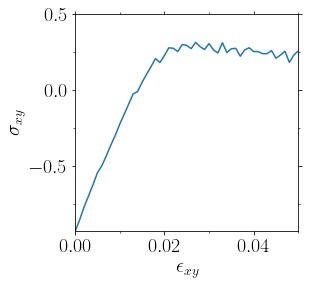

In [29]:
def GetStrsStrain( lmpData, col='sxy' ):

#     fig = plt.figure( figsize = (4,4))
#     ax = fig.add_subplot(111)
#     ax.set_xlabel(r'$\epsilon_{xy}$',fontsize=16)
#     ax.set_ylabel(r'$%s$(Gpa)'%col,fontsize=16)
#     ax.tick_params(labelsize=16)
    #
    #--- point corresponding to strain maps
    Box = {}
    strainDump = []
    Virial = []
    times = lmpData.coord_atoms_broken.keys()
    for itimee in sorted(times):

        #--- extract atom and box properties
        atoms = lp.Atoms( **lmpData.coord_atoms_broken[itimee].to_dict(orient='list') )
        #
        Box[itimee] = lp.Box( BoxBounds = lmpData.BoxBounds[itimee], AddMissing = np.array([0.0,0.0,0.0] ))
        #
        box0 = lp.Box( BoxBounds = lmpData.BoxBounds[0], AddMissing = np.array([0.0,0.0,0.0] ) ) #--- reference state

        #--- volume
        CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( Box[itimee].CellVector )
        volume = np.linalg.det( CellVectorOrtho )

        #--- virial stress
        try: 
            virial = np.sum(atoms[col]) / volume
        except: #--- dump file has no stress entry! 
            if col == 'p':
                virial = -(np.sum(atoms['sxx'])+np.sum(atoms['syy'])+np.sum(atoms['szz'])) / 3.0 / volume
            ReadStrsFromDump = False

        #--- bulk strain
        dx=Box[itimee].CellVector[0,1]-box0.CellVector[0,1]
        l1=Box[itimee].CellVector[1,1]
        ebulk = dx/l1    

        #--- append
        strainDump += [ebulk]
        Virial += [virial*1e-4] #--- bar to gpa 

            #
#     ax.set_xlim(0,0.05)
#     ax.set_ylim(Virial[0],0.5)
#     ax.plot(
# #        sorted(times),
#          0.5*np.array(strainDump),
#         Virial, '-')
#     #
#     plt.savefig('stress.png',dpi=75,bbox_inches='tight',pad_inches=0.0)
#     plt.show()
    #
    return np.array(strainDump), Virial
    
if eval(confParser['flags']['StrsCurve']):
    strain, stress = GetStrsStrain( lmpData,
                  col='sxy',
                 )
    utl.PltErr(0.5*strain,stress,
               attrs={'fmt':'-'},
              xlim=(0,0.05),
               ylim=(stress[0],0.5),
               xstr=r'$\epsilon_{xy}$',
               ystr=r'$\sigma_{xy}$',
               title='stress.png'
              )

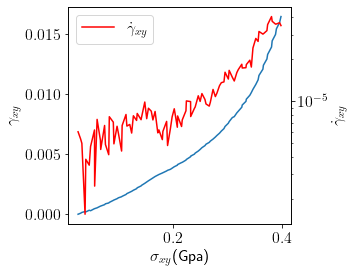

In [14]:
def GetStrsStrain( lmpData, col='sxy' ):

    fig = plt.figure( figsize = (4,4))
    ax = fig.add_subplot(111)
    ax2=ax.twinx()
    #
    ax.set_xlabel(r'$\sigma_{xy}$(Gpa)',fontsize=16)
    ax2.set_ylabel(r'$\dot\gamma_{xy}$',fontsize=16)
    ax.set_ylabel(r'$\gamma_{xy}$',fontsize=16)
    #
    ax2.set_yscale('log')
    #
    ax.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
    #
    #--- point corresponding to strain maps
    Box = {}
    strainDump = []
    Virial = []
    times = lmpData.coord_atoms_broken.keys()
    for itimee in sorted(times):

        #--- extract atom and box properties
        atoms = lp.Atoms( **lmpData.coord_atoms_broken[itimee].to_dict(orient='list') )
        #
        Box[itimee] = lp.Box( BoxBounds = lmpData.BoxBounds[itimee], AddMissing = np.array([0.0,0.0,0.0] ))
        #
        box0 = lp.Box( BoxBounds = lmpData.BoxBounds[0], AddMissing = np.array([0.0,0.0,0.0] ) ) #--- reference state

        #--- volume
        CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( Box[itimee].CellVector )
        volume = np.linalg.det( CellVectorOrtho )

        #--- virial stress
        try: 
            virial = np.sum(atoms[col]) / volume
        except: #--- dump file has no stress entry! 
            if col == 'p':
                virial = -(np.sum(atoms['sxx'])+np.sum(atoms['syy'])+np.sum(atoms['szz'])) / 3.0 / volume
            ReadStrsFromDump = False
    #        virial = -(np.sum(atoms.sxx)+np.sum(atoms.syy)+np.sum(atoms.szz)) / 3.0 / volume

        #--- bulk strain
        dx=Box[itimee].CellVector[0,1]-box0.CellVector[0,1]
        l1=Box[itimee].CellVector[1,1]
        ebulk = dx/l1    

        #--- append
        strainDump += [ebulk]
        Virial += [virial*1e-4] #--- bar to gpa 

            #
    ax.plot(
            sorted(Virial),
            strainDump, '-',label=r'$\gamma_{xy}$')
    ax2.plot(
            sorted(Virial),
            np.gradient(strainDump,sorted(times)), 
            '-',color='red',label=r'$\dot\gamma_{xy}$')
    #
    plt.legend(fontsize=16)
    #
    plt.savefig('stress.png',dpi=75,bbox_inches='tight',pad_inches=0.0)
    plt.show()
    #

if eval(confParser['flags']['StrsCurve']):
    GetStrsStrain( lmpData,
              col='sxy',
             )


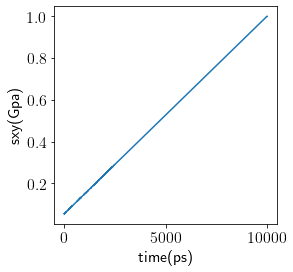

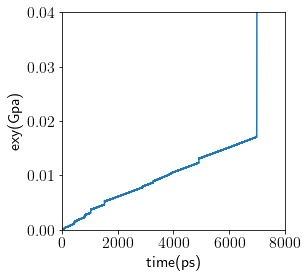

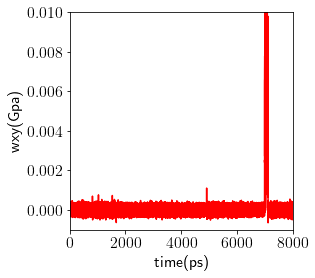

In [8]:
def GetStrsStrain( filee, xcol, ycol, **kwargs ):
    fig = plt.figure( figsize = (4,4))
    ax = fig.add_subplot(111)
    #
    ax.set_xlabel(r'%s(ps)'%xcol,fontsize=16)
    ax.set_ylabel(r'%s(Gpa)'%ycol,fontsize=16)
    #
    ax.tick_params(labelsize=16)
    #
    if 'xlim' in kwargs:
        ax.set_xlim(kwargs['xlim'])
    #
    if 'ylim' in kwargs:
        ax.set_ylim(kwargs['ylim'])
    #
    if 'xscale' in kwargs:
        ax.set_xscale(kwargs['xscale'])
    if 'yscale' in kwargs:
        ax.set_yscale(kwargs['yscale'])
    #
    df = pd.read_csv(filee,sep=' ')
    try:
        ax.plot(
                df[xcol],
                df[ycol], '-')
    except:
        if ycol == 'wxy':
            ax.plot(
                    df[xcol],
                    np.gradient(df['exy'],df['time']), 
                    '-',color='red',label=r'$\dot\gamma_{xy}$')
    #
    plt.savefig('stress.png',dpi=75,bbox_inches='tight',pad_inches=0.0)
    plt.show()

if eval(confParser['flags']['StrsCurve']):

    GetStrsStrain( '%s/temperature.txt'%path,
                   xcol = 'time',
                   ycol = 'sxy',

                 )

    GetStrsStrain( '%s/temperature.txt'%path,
                   xcol = 'time',
                   ycol = 'exy',
                  xlim=np.array([0.0,.8])*10000,
                  ylim=[0.0,0.04]             
                 )

    GetStrsStrain( '%s/temperature.txt'%path,
                   xcol = 'time',
                   ycol = 'wxy',
                  xlim=np.array([0.0,0.8])*10000,
                  ylim=[-1e-3,1e-2],
                  xscale = 'linear', yscale = 'linear',
                 )

## parse data

In [73]:
#itimee=np.sum(list(lmpData.coord_atoms_broken.keys())) #--- only two timesteps:[0,ntime]
itimee=list(lmpData.coord_atoms_broken.keys())[-1] #--- only two timesteps:[0,ntime]
atomsRf = lp.Atoms( **lmpData.coord_atoms_broken[0].to_dict(orient='series') )
atoms = lp.Atoms( **lmpData.coord_atoms_broken[itimee].to_dict(orient='series') )
    #
box = lp.Box( BoxBounds = lmpData.BoxBounds[itimee],AddMissing = np.array([0.0,0.0,0.0] ) )
#box.BasisVectors( AddMissing = np.array([0.0,0.0,0.0] ))
    
display(pd.DataFrame(atoms.__dict__).head())
pd.DataFrame(atomsRf.__dict__).head()


,x,y,z,id,type,sxx,syy,szz
0,759.118,0.000024,130.658000,1,2,-1.357704,-1.937690,-1.789042
1,759.118,2.053570,2.748980,2,2,0.267779,0.197274,-0.254791
2,759.118,4.107130,1.281910,3,2,-0.176395,-1.471237,-0.523178
3,760.378,2.053570,0.621057,4,3,0.244517,-0.317857,0.456492
4,760.378,4.107130,3.475060,5,1,0.805389,0.239947,1.052140


,x,y,z,id,type,sxx,syy,szz
0,0.00000,0.00000,0.065458,1,2,-1.123136,-0.340794,-0.851273
1,0.00000,2.05355,2.844020,2,2,-1.780600,1.228752,1.590494
2,0.00000,4.10711,1.376950,3,2,-0.147734,-0.540406,1.601411
3,1.25962,2.05355,0.716095,4,3,0.144675,-0.449206,-0.448972
4,1.25962,4.10711,3.570100,5,1,-0.122598,-0.171723,-1.372653


## removed atom

In [10]:
# atom_id=np.sum(atomsRf.id)-np.sum(atoms.id)
# print('atom_id=',atom_id)
# zz=pd.DataFrame(atomsRf.__dict__)[pd.DataFrame(atomsRf.__dict__)['id']==atom_id]['z'].iloc[0]

In [11]:
# PrintOvito( pd.DataFrame(atomsDiff.__dict__), 
#             open( 'strsDiff.xyz','w'), 
#             footer = 'ITIME=%s'%itimee,
#             attr_list=['id','type','x','y','z','sxx' ,'syy' ,'szz' ,'sxy' ,'sxz' ,'syz'] )

# Displacements

In [74]:
if eval(confParser['flags']['Displ']):
    !ovitos OvitosCna.py $fileName Disp.xyz $nevery 4
    
#--- read from d2min.xyz
    ovtData = lp.ReadDumpFile( 'Disp.xyz' )
    ovtData.GetCords( ncount = sys.maxsize, 
                     columns = {'DisplacementX':'ux','DisplacementY':'uy','DisplacementZ':'uz'} )
    #
    disp = lp.Atoms( **ovtData.coord_atoms_broken[itimee].to_dict(orient='series'))


# Voronoi Analysis

In [269]:
if eval(confParser['flags']['VorAnl']):
    !mkdir voranl

    path = confParser['input files']['path']
    indx = confParser['input files']['fileIndex']
    fileName = '%s/%s'%(path,confParser['input files']['filename'].split()[int(indx)])
    nevery = int(confParser['parameters']['nevery'])
    types = list(map(int,confParser['Atomic Radius']['type'].split()))
    radius = list(map(float,confParser['Atomic Radius']['radius'].split()))
    AtomicRadius = dict(zip(types,radius))
        
    rad1=AtomicRadius[1]
    rad2=AtomicRadius[2]
    rad3=AtomicRadius[3]
    !ovitos OvitosCna.py $fileName voranl/Voronoi.xyz $nevery 3 $rad1 $rad2 $rad3
    
#--- read from d2min.xyz
    ovtData = lp.ReadDumpFile( 'voranl/Voronoi.xyz' )
    ovtData.GetCords( ncount = sys.maxsize)

mkdir: voranl: File exists
InputFile= /Users/Home/Desktop/Tmp/txt/git/HeaDef/lammpsRuns/AmirData/shengAnnealed/Temp600/Run0/quench_600.dump
num_frames= 11
frame=0
frame=1
frame=2
frame=3
frame=4
frame=5
frame=6
frame=7
frame=8
frame=9
frame=10
reached end of file!


# Press. Fluc

In [221]:
!mkdir PressFluc

mkdir: PressFluc: File exists


In [222]:
def StrsDiff(atoms,atomsRf):
    atomsDiff = lp.Atoms( **pd.DataFrame(atoms.__dict__).copy().to_dict(orient='series'))
    atoms0 = lp.Atoms( **pd.DataFrame(atomsRf.__dict__).copy().to_dict(orient='series'))
    #--- virial energy to stress
    for key in ['sxx','syy','szz']:#,'sxy','syz','sxz']:
        atomsDiff.__dict__[key] /= atomsDiff['AtomicVolume']
        atoms0.__dict__[key] /= atoms0['AtomicVolume']
    df=pd.DataFrame(atoms0.__dict__).set_index('id').loc[atoms.id]
    #--- stress change
#    for key in ['sxx','syy','szz','sxy','syz','sxz','AtomicVolume']:
#        atomsDiff.__dict__[key] -= np.array((df[key]).tolist())
        
    #--- volumetric strain
#    atomsDiff.AtomicVolume /= atoms0.AtomicVolume
#    display(pd.DataFrame(atomsDiff.__dict__))
    return atomsDiff

if eval(confParser['flags']['PressFluc']):
    #--- fetch radii
    radii=list(map(float,confParser['Atomic Radius']['radius'].split()))
    types=list(map(int,confParser['Atomic Radius']['type'].split()))
    AtomicRadius=dict(zip(types,radii))
    #
    itime = 0
    atoms = lp.Atoms( **lmpData.coord_atoms_broken[itime].to_dict(orient='series'),
                      rad = list(map(AtomicRadius.get,lmpData.coord_atoms_broken[itime]['type'])),
                       AtomicVolume = ovtData.coord_atoms_broken[itime]['AtomicVolume'].tolist(),
                    )
    #---
    atoms0 = lp.Atoms( **lmpData.coord_atoms_broken[0].to_dict(orient='series'),
                      rad = list(map(AtomicRadius.get,lmpData.coord_atoms_broken[0]['type'])),
                       AtomicVolume = ovtData.coord_atoms_broken[0]['AtomicVolume'].tolist(),
                    )

    display(pd.DataFrame(atoms.__dict__).head())
    
    #--- pressure change
    atomd=StrsDiff(atoms,atoms0) #--- atomd.sxx has units of stress 
    #--- filter abs(dv)>0
    atomd = lp.Atoms( **pd.DataFrame(atomd.__dict__)[np.abs(atomd.AtomicVolume)>1.0e-10].to_dict(orient='series'))
    display(pd.DataFrame(atomd.__dict__).head())

,x,y,z,id,type,sxx,syy,szz,AtomicVolume,rad
0,106.417000,-0.689717,-0.836949,1,2,0.009265,0.248562,1.271153,12.007525,1.252
1,0.438228,1.263970,-0.737561,2,1,0.618270,-0.933518,0.382728,12.020290,1.244
2,106.223000,1.226650,0.960201,3,1,0.341605,0.742351,0.150428,11.106683,1.244
3,0.663644,-0.723179,0.887053,4,3,0.938900,-1.727682,-0.796727,11.569313,1.267
4,2.238300,-0.570260,106.505000,5,1,-1.228028,0.532413,-0.543949,11.585935,1.244


,x,y,z,id,type,sxx,syy,szz,AtomicVolume,rad
0,106.417000,-0.689717,-0.836949,1,2,0.000772,0.020701,0.105863,12.007525,1.252
1,0.438228,1.263970,-0.737561,2,1,0.051436,-0.077662,0.031840,12.020290,1.244
2,106.223000,1.226650,0.960201,3,1,0.030757,0.066838,0.013544,11.106683,1.244
3,0.663644,-0.723179,0.887053,4,3,0.081154,-0.149333,-0.068866,11.569313,1.267
4,2.238300,-0.570260,106.505000,5,1,-0.105993,0.045953,-0.046949,11.585935,1.244


## Scatter plot

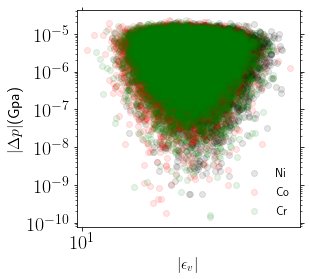

In [174]:
def PlotScatter(atomd,**kwargs):
    
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    #
    if 'xlim' in kwargs:
        ax.axis(kwargs['xlim'])
    if 'Logy' in kwargs and kwargs['Logy']:
        ax.set_yscale('log')
    if 'Logx' in kwargs and kwargs['Logx']:
        ax.set_xscale('log')
    #
    ax.set_ylabel(kwargs['ylabel'] if 'ylabel' in kwargs else '',fontsize=16)
    ax.set_xlabel(kwargs['xlabel'] if 'xlabel' in kwargs else '',fontsize=16)

    #
    ax.tick_params(labelsize=20,which='both',axis='both', top=True, right=True)

    y=np.array(atomd.sxx)+np.array(atomd.syy)+np.array(atomd.szz)
    y *= (-1.0e-4/3.0)
    x = np.array(atomd.AtomicVolume)
    
    cxy=0.0
    if 'zscore' in kwargs and kwargs['zscore']:
        x = Zscore(x)
        y = Zscore(y)
        cxy = np.sum(x*y)/len(x)
    for elm,indxx,col in zip(['Ni','Co','Cr'],[1,2,3],['black','red','green']):
        filtr = np.array(atomd.type) == indxx
        ax.scatter(np.abs(x[filtr]),np.abs(y[filtr]),
                   alpha=.1,c=col,label=elm)#,marker='x')
    #
    ax.legend(frameon=False, fontsize=12)
    #
#     DrawFrame(ax, 0.2,0.09,0.15,0.06,0.04,LOG_Y=True)
    PutMinorTicks( ax, LOGY = True, LOGX=True)
    #
    plt.savefig('scatter.png',dpi=2*75,bbox_inches='tight',pad_inches=0.0)
    plt.show()

    return cxy
    
if eval(confParser['flags']['PressFluc']) and\
   eval(confParser['flags']['VorAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    #--- scatter plot of press and volumetric strain
    cxy = PlotScatter(atomd,
#               zscore = True,
#               xlim=[1e-7,1e-3,1e-8,1e4],
               Logx=True, Logy=True,
               ylabel = r'$|\Delta p|$(Gpa)',
               xlabel = r'$|\epsilon_v|$',
               )
    np.savetxt('PressFluc/PressVolCrltn.txt',[cxy],header='<p.v>')

## Mean pressure

In [175]:
if eval(confParser['flags']['PressFluc']):
    press=np.sum(np.array(atoms.sxx)+np.array(atoms.syy)+np.array(atoms.szz))
    vol = np.linalg.det(box.CellVector)
    press *= (-1.0e-4/3.0/vol)

    press0=np.sum(np.array(atoms0.sxx)+np.array(atoms0.syy)+np.array(atoms0.szz))
    vol = np.linalg.det(box.CellVector)
    press0 *= (-1.0e-4/3.0/vol)

    print('dp=',press-press0)
    np.savetxt('PressFluc/PressChange.txt',[press-press0],header='DeltaPress')


dp= 0.0


### multiple frames

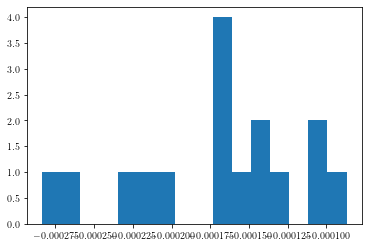

-0.00016933927094734172 0.3226011995601016


In [176]:
if not eval(confParser['flags']['RemoteMachine']):
    sarr = MultipleFrames2nd( path='NiCoCrNatom100KTakeOneOutRlxd', title='PressChange.txt', nrun = 16, ncols=1 ).flatten()

    plt.hist(sarr,bins=16)
    plt.show()
    
    print(sarr.mean(),sarr.std()/np.abs(sarr.mean()))

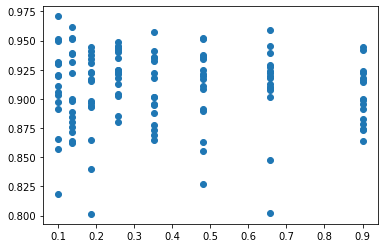

In [18]:
# fraci = np.logspace(np.log10(0.1),np.log10(0.9),8)
# for ifrac, fracc in zip(range(1000),fraci):
#     sarr  = MultipleFrames2nd(path='HeaNiCoCrNatom10KTakeOneOutFreezeFract%sRlxd'%ifrac,
#                               nrun=32,title='PressVolCrltn.txt',ncols=1).flatten()
#     indices = ~np.isnan( sarr )
#     sarr = sarr[ indices ]
#     plt.scatter([fracc]*len(sarr),-sarr,color='C0')
# plt.show()

## distortions

### equilibrium?

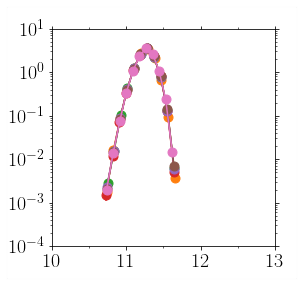

In [270]:
if eval(confParser['flags']['PressFluc']):

    #--- timesteps
    times =  list(lmpData.coord_atoms_broken.keys())
    times.sort()
    ntime=len(times)

    #--- plot
    ax=utl.PltErr(None,None,Plot=False)


    #--- loop over time
    for itime in times[int(ntime/2):ntime]:
        atoms = lp.Atoms( **lmpData.coord_atoms_broken[itime].to_dict(orient='series'),
                          rad = list(map(AtomicRadius.get,lmpData.coord_atoms_broken[itime]['type'])),
                           AtomicVolume = ovtData.coord_atoms_broken[itime]['AtomicVolume'].tolist(),
                        )

        hist1, edges1, error1 = GetPDF( atoms.AtomicVolume, 
                                         linscale = True, 
                                         n_per_decade=12,
                                         density = True,
                                                    )

        utl.PltErr(edges1,hist1,
                       yerr=error1,
                        markevery=1,markersize=9,
                        yscale='log',
                        xscale='linear',
                        marker='o',
                       ax=ax,
            #            xstr='r',
            #            ystr='Std./Mean',
                        Plot=False,
                            ylim=(1e-4,1e1),
                            xlim=(10,13),
    #                        title='PressFluc/pdfNiLocalConcentration.png',
                        DrawFrame=[0.2,0.1,0.15,0.1,0.01],
                      )

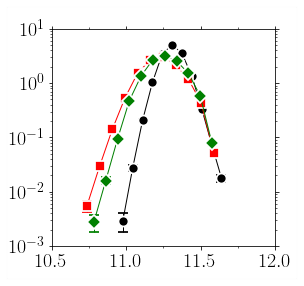

In [271]:
if eval(confParser['flags']['PressFluc']):
    #--- plot
    symbols=Symbols()
    lg = Legends()
    lg.Set(fontsize=16,
           bbox_to_anchor=(0.0,0.48,0.5,0.5),
          )
    ax=utl.PltErr(None,None,Plot=False)

    #--- initialize
    std = np.zeros(3)
    meann = np.zeros(3)

    #--- loop over types
    for atom_type, count, ll in zip([1,2,3],range(3),['Ni','Co','Cr']):    
        #--- fetch volumes
        itime = times[-1]
        atoms = lp.Atoms( **lmpData.coord_atoms_broken[itime].to_dict(orient='series'),
                          rad = list(map(AtomicRadius.get,lmpData.coord_atoms_broken[itime]['type'])),
                           AtomicVolume = ovtData.coord_atoms_broken[itime]['AtomicVolume'].tolist(),
                        )

        #--- histograms
        filtr = atoms.type == atom_type

        hist1, edges1, error1 = GetPDF( pd.DataFrame(atoms.__dict__)[filtr].AtomicVolume, 
                                         linscale = True, 
                                         n_per_decade=12,
                                         density = True,
                                                    )

        #--- std
        std[count] = np.std(pd.DataFrame(atoms.__dict__)[filtr].AtomicVolume)
        meann[count] = np.mean(pd.DataFrame(atoms.__dict__)[filtr].AtomicVolume)
        temp = eval(confParser['parameters']['temperature'])

        #--- plot
        utl.PltErr(edges1,hist1,
                       yerr=error1,
                        yscale='log',
                        xscale='linear',
                       ax=ax,
                        attrs=symbols.GetAttrs(count=count,label='%s'%ll,fmt='.-'),      
                   #            xstr='r',
            #            ystr='Std./Mean',
                        Plot=False,
                            ylim=(1e-3,1e1),
                            xlim=(10.5,12),
                        DrawFrame=[0.2,0.1,0.15,0.1,0.01],
                      )
    utl.PltErr(None,None,
#               legend=lg.Get(),
               ax=ax,
               yscale='log',
                title='PressFluc/hist_vorVolumeTemp%sRss.png'%confParser['parameters']['temperature'],
                DrawFrame=[0.2,0.1,0.15,0.1,0.01],
              )


    #--- save
    np.savetxt('PressFluc/voronoiFluctuationsTemp%sRss.txt'%temp,np.c_[np.concatenate(([temp],std))].T,header='Temp\tstdNi\tstdCo\tstdCr')
    np.savetxt('PressFluc/voronoiAverageTemp%sRss.txt'%temp,np.c_[np.concatenate(([temp],meann))].T,header='Temp\tmeanNi\tmeanCo\tmeanCr')


In [272]:
meann-np.mean(meann)

array([ 0.04002906, -0.0330041 , -0.00702496])

In [259]:
meann-np.mean(meann)

array([ 0.08200335, -0.07476514, -0.00723821])

parse from NiCoCrNatom100KDistortions/Temp400/Run0/PressFluc/voronoiFluctuationsTemp400.txt
parse from NiCoCrNatom100KDistortions/Temp600/Run0/PressFluc/voronoiFluctuationsTemp600.txt
parse from NiCoCrNatom100KDistortions/Temp800/Run0/PressFluc/voronoiFluctuationsTemp800.txt
parse from NiCoCrNatom100KDistortions/Temp1000/Run0/PressFluc/voronoiFluctuationsTemp1000.txt
parse from NiCoCrNatom100KDistortions/Temp1200/Run0/PressFluc/voronoiFluctuationsTemp1200.txt
parse from NiCoCrNatom100KDistortions/Temp1400/Run0/PressFluc/voronoiFluctuationsTemp1400.txt
[400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0]
parse from PressFluc/voronoiFluctuationsTemp5Rss.txt
[0.09581234 0.10512655 0.12209618]


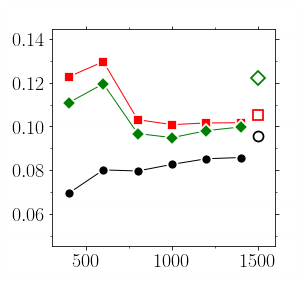

In [238]:
if eval(confParser['flags']['PressFluc']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    #--- plot std vs. temperature
    #--- parse
    temperature = []
    stdd = []
    for temp, count in zip([400,600,800,1000,1200,1400],range(100)): #--- T
        pathh = 'NiCoCrNatom100KDistortions/Temp%s/Run0/PressFluc/voronoiFluctuationsTemp%s.txt'%(temp,temp)
        print('parse from %s'%pathh)
        sdata = np.loadtxt(pathh)
        #--- filter
        #--- order parameter
        temperature.append(sdata[0])
        stdd.append(sdata[1:])
            #--- mean y
    print(temperature)
    
    #--- parse rss
    pathh = 'PressFluc/voronoiFluctuationsTemp5Rss.txt'
    print('parse from %s'%pathh)
    sdata = np.loadtxt(pathh)
    #--- filter
    #--- order parameter
#        temperature.append(sdata[0])
    std_rss = sdata[1:]
    print(std_rss)
    
    #--- plot
    ax = utl.PltErr(None,None,Plot=False)
    for count in range(3):
        utl.PltErr(temperature,np.c_[stdd][:,count],
                   attrs=symbols.GetAttrs(count=count),
                   ax=ax,
                   Plot=False,
                  )
        utl.PltErr([1500],std_rss[count],
                   attrs=symbols.GetAttrs2nd(count=count),
                   ax=ax,
                   DrawFrame=[0.2,0.1,0.15,0.1,0.01],
                   xlim=(300,1600),
                   Plot=False,
                   )

        
    #--- plot rss



parse from NiCoCrNatom100KDistortions/Temp400/Run0/PressFluc/voronoiAverageTemp400.txt
parse from NiCoCrNatom100KDistortions/Temp600/Run0/PressFluc/voronoiAverageTemp600.txt
parse from NiCoCrNatom100KDistortions/Temp800/Run0/PressFluc/voronoiAverageTemp800.txt
parse from NiCoCrNatom100KDistortions/Temp1000/Run0/PressFluc/voronoiAverageTemp1000.txt
parse from NiCoCrNatom100KDistortions/Temp1200/Run0/PressFluc/voronoiAverageTemp1200.txt
parse from NiCoCrNatom100KDistortions/Temp1400/Run0/PressFluc/voronoiAverageTemp1400.txt
[400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0]
parse from PressFluc/voronoiAverageTemp5Rss.txt
[11.32832886 11.17156037 11.2390873 ]


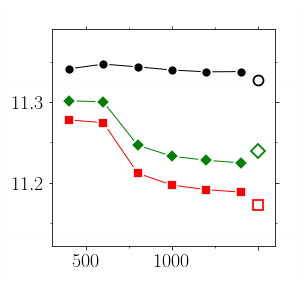

In [248]:
if eval(confParser['flags']['PressFluc']) and not\
   eval(confParser['flags']['RemoteMachine']):
    #--- plot order parameter vs. distance
    temperature = []
    meann = []
    for temp, count in zip([400,600,800,1000,1200,1400],range(100)): #--- T
        pathh = 'NiCoCrNatom100KDistortions/Temp%s/Run0/PressFluc/voronoiAverageTemp%s.txt'%(temp,temp)
        print('parse from %s'%pathh)
        sdata = np.loadtxt(pathh)
        #--- filter
        #--- order parameter
        temperature.append(sdata[0])
        meann.append(sdata[1:])
            #--- mean y
    print(temperature)
    #--- parse rss
    pathh = 'PressFluc/voronoiAverageTemp5Rss.txt'
    print('parse from %s'%pathh)
    sdata = np.loadtxt(pathh)
    #--- filter
    #--- order parameter
#        temperature.append(sdata[0])
    mean_rss = sdata[1:]
    print(mean_rss)
    
    #--- plot
    ax = utl.PltErr(None,None,Plot=False)
    for count in range(3):
        utl.PltErr(temperature,np.c_[meann][:,count],
                   attrs=symbols.GetAttrs(count=count),
                   ax=ax,
                   Plot=False,

                  )
        utl.PltErr([1500],mean_rss[count],
                   attrs=symbols.GetAttrs2nd(count=count),
                   ax=ax,
                   Plot=False,
                    title='PressFluc/voronoiAverageTempSro.png',
                    DrawFrame=[0.2,0.1,0.15,0.1,0.01],
                   xlim=(300,1600),
                xticks=(['$500$','$1000$',''],[500,1000,1500])
                  )

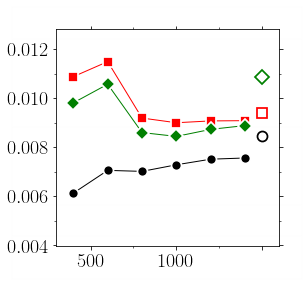

In [247]:
ax = utl.PltErr(None,None,Plot=False)
for count in range(3):
    utl.PltErr(temperature,np.c_[stdd][:,count]/np.c_[meann][:,count],
               attrs=symbols.GetAttrs(count=count),
               ax=ax,
               Plot=False,

              )
    utl.PltErr([1500],std_rss[count]/mean_rss[count],
               attrs=symbols.GetAttrs2nd(count=count),
               ax=ax,
               Plot=False,
                title='PressFluc/voronoiStdTempSro.png',
                DrawFrame=[0.2,0.1,0.15,0.1,0.01],
               xlim=(300,1600),
                xticks=(['$500$','$1000$',''],[500,1000,1500])
              )

## pressure decay

### map

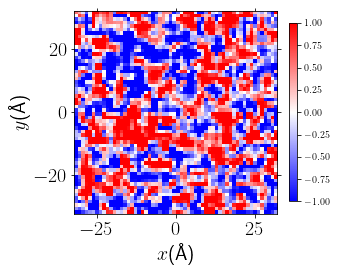

In [65]:
def Intrp( d2min, box0,times, time0, Plot = None ):
    #--- mean dist between atoms 
    natoms = len( d2min.x ) 
    CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( box0.CellVector )
    volume = np.linalg.det( CellVectorOrtho )
    dmean = 0.5*( volume / natoms ) ** (1.0/3.0) 


    #--- grid tiling mapped box with original size
    #--- values are interpolated onto this grid
    (xlin, ylin, zlin), (xv, yv, zv) = lp.GetCubicGrid( box0.CellOrigin, 
                                                     box0.CellVector, 
                                                     dmean,
                                                     margin = 0.0 * dmean )
    xi = np.array(list(zip(xv.flatten(), yv.flatten(), zv.flatten())))

    #--- expand the original box
        #--- map to square box
    mapp = lp.Map( d2min, box0 ) 
    mapp.ChangeBasis()
    mapp.Set( d2min ) #--- atoms: add mapped xyz

    cptmp = lp.Copy(d2min, box0) #--- important: must be reference frame!!
    cptmp.Expand( epsilon = 0.3, mode = 'isotropic' )
    d2exp = cptmp.Get()

    points = np.c_[d2exp.xm,d2exp.ym,d2exp.zm] #--- unstructured points
    values = np.c_[-(np.array(d2exp.sxx)+np.array(d2exp.syy)+np.array(d2exp.szz))/3.0/np.array(d2exp.AtomicVolume)] #--- corresponding values

    grid_z = scp_int.griddata(points, values, xi, method='linear')
    assert not np.any(np.isnan(grid_z.flatten())), 'increase ev!'

    #--- make an object
    d2intrp = lp.Atoms(**pd.DataFrame(np.c_[xi,grid_z],columns=['x','y','z','d2min']).to_dict(orient='list'))

    if Plot:
    #--- reshape value
        nx,ny,nz = len(xlin), len(ylin),len(zlin) 
        value = np.c_[d2intrp.d2min].reshape(((ny,nx,nz)))

        CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( box0.CellVector ) #--- box length
        #--- xy plane
        zz=0.5*(zlin[-1]+zlin[0])
        dz = zlin[-1]-zlin[-2]
        lz = zlin[-1]-zlin[0]
        nzz=int(nz*(zz-zlin[0])/lz)
        val = value[:,:,nzz].copy()
#        pdb.set_trace()

        np.savetxt('pressBitmap.txt',val)

        PltBitmap(val, 
                  xlabel = r'$x$(\r{A})', ylabel = r'$y$(\r{A})',
                  xlim=VectorNorm[0]*np.array([-0.5,0.5]),ylim=VectorNorm[1]*np.array([-0.5,0.5]),
                  zscore = True,
                  frac = 0.5, #--- plot a patch
                  title = 'd2min.png',
                  colorbar=True,
                )

    return (xlin, ylin, zlin), (xv[:,:,nzz], yv[:,:,nzz], zv[:,:,nzz]), d2intrp
  
if not eval(confParser['flags']['RemoteMachine']):
    junk, (xv, yv, zv), d2intrp = Intrp(atoms, box,
                    times = [0], #list(lmpData.coord_atoms_broken.keys()),
                    time0 =0,
                    Plot = True,
                   )

#### map and scatterd plot 

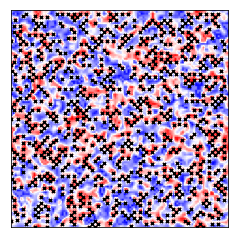

In [76]:
def PltBitmapWithScatter( value, xyScatter,
              xlabel = 'x', ylabel = 'y',
              xlim = (-0.5,0.5), ylim = (-0.5,0.5),
              frac = 1.0, #--- plot a patch
              zscore = True,
              title = 'cxy.png',
              colorbar=False,
              ticklabels=True,
              color='black',
              **kwargs
             ):
        
    val = value.copy()
    #--- z-score
    if zscore:
        val -= np.mean(val)
        val /= np.std(val)
        val[val>2.0]=1.0
        val[val<-2.0]=-1.0
    #--- plot
    (mgrid,ngrid) = val.shape
    center = (ngrid/2,mgrid/2)
    #
    aspect = (ylim[1]-ylim[0])/(xlim[1]-xlim[0])
    fig = plt.figure(figsize=(4,4*aspect))
    ax = fig.add_subplot(111)
    ax.set_xlabel(xlabel,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.tick_params(labelsize=16,which='both',axis='both', top=True, right=True)
    if not ticklabels:
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
    #
    pos = ax.imshow(val.real,cmap='bwr',
                     extent=(xlim[0],xlim[1],ylim[0],ylim[1]),origin='lower')# ,vmin=-.6, vmax=.6)
    
    ax.scatter(xyScatter[:,0],xyScatter[:,1],
           alpha=1,color=color,marker='x',s=10)
        
        
    if colorbar:
        ax.colorbar( pos, fraction = 0.04)
    if 'DrawFrame' in kwargs: 
        DrawFrame(ax, *kwargs['DrawFrame'])
    plt.savefig(title,dpi=2*75,bbox_inches='tight',pad_inches=0.0)
    plt.show()
    
def Intrp( d2min, box0,times, time0, title = 'bitmap', Plot = None ):
    d2intrp = {}
    for itime in times:
        #--- mean dist between atoms 
        natoms = len( d2min.x ) 
        CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( box0.CellVector )
        volume = np.linalg.det( CellVectorOrtho )
        dmean = 0.5*( volume / natoms ) ** (1.0/3.0) 


        #--- grid tiling mapped box with original size
        #--- values are interpolated onto this grid
        (xlin, ylin, zlin), (xv, yv, zv) = lp.GetCubicGrid( box0.CellOrigin, 
                                                         box0.CellVector, 
                                                         dmean,
                                                         margin = 0.0 * dmean )
        xi = np.array(list(zip(xv.flatten(), yv.flatten(), zv.flatten())))

        #--- expand the original box
            #--- map to square box
        mapp = lp.Map( d2min, box0 ) 
        mapp.ChangeBasis()
        mapp.Set( d2min ) #--- atoms: add mapped xyz

        cptmp = lp.Copy(d2min, box0) #--- important: must be reference frame!!
        cptmp.Expand( epsilon = 0.2, mode = 'isotropic' )
        d2exp = cptmp.Get()

        points = np.c_[d2exp.xm,d2exp.ym,d2exp.zm] #--- unstructured points
        values = np.c_[-(np.array(d2exp.sxx)+np.array(d2exp.syy)+np.array(d2exp.szz))/3.0] #--- corresponding values

        grid_z = scp_int.griddata(points, values, xi, method='linear')
        assert not np.any(np.isnan(grid_z.flatten())), 'increase ev!'

        #--- make an object
        d2intrp[ itime ] = lp.Atoms(**pd.DataFrame(np.c_[xi,grid_z],columns=['x','y','z','d2min']).to_dict(orient='list'))

        if Plot:
        #--- reshape value
            nx,ny,nz = len(xlin), len(ylin),len(zlin) 
            value = np.c_[d2intrp[ itime ].d2min].reshape(((ny,nx,nz)))

            CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( box0.CellVector ) #--- box length
            #--- xy plane
#            zz=0.0
            zc=0.5*(zlin[0]+zlin[-1])
            dz = zlin[-1]-zlin[-2]
            lz = zlin[-1]-zlin[0]
            #
            zz = [zc,zlin[-1]][1]
            nzz=int(nz*(zz-zlin[0])/lz)
            if nzz == nz: nzz -= 1
            val = value[:,:,nzz].copy()
#            pdb.set_trace()
        
#            np.savetxt('pressBitmap.txt',val)

#             PltBitmap(val, 
#                       xlabel = 'x', ylabel = 'y',
#                       xlim=VectorNorm[0]*np.array([0.0,1.0]),ylim=VectorNorm[1]*np.array([0.0,1.0]),
#                       zscore = True,
#                       frac = 1.0, #--- plot a patch
#                  title = '%s%s.png'%(title,itime),
#                       colorbar=True,
#                     )
            
            #--- filter
            zlo=(zz-dz-zlin[0]) % lz + zlin[0]
            zhi=(zz+dz-zlin[0]) % lz + zlin[0]

            indxx= np.all([d2min.z > zlo, 
                           d2min.z < zhi
                          ],
                            axis=0)
            
            if zhi < zlo: #--- periodicity
                indxx= np.any([d2min.z > zlo, 
                               d2min.z < zhi
                              ],
                                axis=0)


            indices = d2min.type == 1 #--- Ni 3
            indxx = np.all([indxx,indices],axis=0)

            PltBitmapWithScatter(val, 
                  np.c_[np.array(d2min.x)[indxx],np.array(d2min.y)[indxx]],
                  xlabel = '', ylabel = '',
    #                  xlim=VectorNorm[0]*np.array([0.0,1.0]),ylim=VectorNorm[1]*np.array([0.0,1.0]),
                  xlim=np.array([xlin[0],xlin[-1]]),ylim=np.array([ylin[0],ylin[-1]]),
                  zscore = True,
                  frac = 1.0, #--- plot a patch
                  title = '%s%s.png'%(title,itime),
                  colorbar=None,
                  ticklabels = None,
                  color='black',
    #                     DrawFrame=[0.2,0.09,0.15,0.06,0.04],
                  )
                
                

    return (xlin, ylin, zlin), (xv[:,:,:], yv[:,:,:], zv[:,:,:]), d2intrp
  
if not eval(confParser['flags']['RemoteMachine']):
    #--- local pressure and Ni atoms
    junk, (xv, yv, zv), d2intrp = Intrp(atoms0, box,
                    times = [0], #list(lmpData.coord_atoms_broken.keys()),
                    time0 =0,
                    Plot = True,
                    title = 'cr',
                   )

#### average map

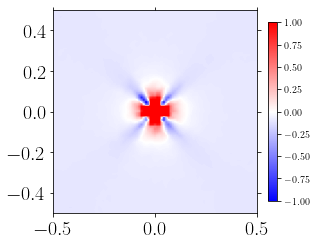

In [267]:
if not eval(confParser['flags']['RemoteMachine']):
    nruns=16
    for irun in range(nruns):
        val=np.loadtxt('NiCoCrNatom100KTakeOneOutRlxd/Run%s/pressBitmap.txt'%irun)
        if irun == 0:
            valm = val.copy()
        else:
            valm += val
    valm /= nruns

    PltBitmap(valm, 
              xlabel = '', ylabel = '',
    #          xlim=VectorNorm[0]*np.array([0.0,1.0]),ylim=VectorNorm[1]*np.array([0.0,1.0]),
              zscore = True,
              frac = 1.0, #--- plot a patch
              title = 'd2min.png',
              colorbar=True,
    #          DrawFrame=[0.3,0.3,0.3,0.1,0.1],
            )

### scaling

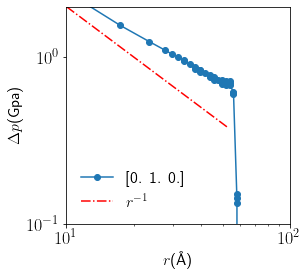

In [97]:
def GetCR( X, Y, Z, zfield, DIR, tol=1e-3, title='decay.png',**kwargs ):
    if 'xc' in kwargs:
        X = X.copy()
        Y = Y.copy()
        Z = Z.copy()
        xc = kwargs['xc']
        X -= xc[0]
        Y -= xc[1]
        Z -= xc[2]
    xyz = np.c_[X,Y,Z]
    xyzNorm = np.array(list(map(lambda x: np.sum(x)**.5,xyz*xyz)))
    #
    #--- plot
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.tick_params(labelsize=18)
    if 'Logy' in kwargs and kwargs['Logy']:
        ax.set_yscale('log')
    if 'Logx' in kwargs and kwargs['Logx']:
        ax.set_xscale('log')
    if 'xlim' in kwargs:
        ax.axis(kwargs['xlim'])
    ax.set_ylabel(kwargs['ylabel'] if 'ylabel' in kwargs else '',fontsize=16)
    ax.set_xlabel(kwargs['xlabel'] if 'xlabel' in kwargs else '',fontsize=16)
    #
    for ndir in DIR:
        dot = np.sum(xyz * ndir,axis=1) / np.sum(ndir*ndir)**0.5 / xyzNorm
        assert np.all([-1.0<=dot,dot<=1.0])
        #
        indices= np.abs(1.0-dot) < tol
        #
        xx=X[indices]
        yy=Y[indices]
        zz=Z[indices]
    #    print(np.c_[xx,yy,zz])
        #
        rr=np.sqrt(xx*xx+yy*yy+zz*zz)
        rho = zfield[indices]
        assert len( rr ) > 0 
        assert len(rho[np.isnan(rho)]) == 0
        #
        slist=list(zip(rr,rho))
        slist.sort()
        rr = [i[0] for i in slist]
        rho = [i[1] for i in slist]
        ax.plot(rr,rho,'-o',label=r'%s'%ndir)
#        print(np.c_[rr,rho])
    #
    #--- draw power law
    if 'alpha' in kwargs:
        alpha = kwargs['alpha']
        xx=ax.lines[0].get_data()[0]
        xx.sort()
        xx = np.array(xx)
        ax.plot(ax.axis()[0]*(xx/xx[0]),ax.axis()[3]*(xx[0]/xx)**alpha,'-.r',label='$r^{-%s}$'%alpha)
        #
        ax.legend(frameon=False, fontsize=16)
    #--- save
    if 'Logy' in kwargs and kwargs['Logy']:
        PutMinorTicks(ax, LOGY=True)
    if 'Logx' in kwargs and kwargs['Logx']:
        PutMinorTicks(ax, LOGX=True)
    #DrawFrame(ax, 0.3,0.3,0.3,0.1,0.1)
    plt.savefig(title,dpi=2*75,bbox_inches='tight',pad_inches=0.0)
    plt.show()

    
    
if not eval(confParser['flags']['RemoteMachine']):

    #--- decay of local pressure
    valm = -1.0e-4*(atoms.sxx+atoms.syy+atoms.szz)/atoms.AtomicVolume/3.0 #--- corresponding values
    GetCR( atoms.x, atoms.y, atoms.z, valm, 
    #      np.array([[1.0,1.0,0.0],[-1.0,1.0,0.0],[-1.0,-1.0,0.0],[1.0,-1.0,0.0]] ),
    #      np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[-1.0,0.0,0.0],[0.0,-1.0,0.0]] ),
          np.array([[0.0,1.0,0.0]]),#,[1.0,1.0,0.0]] ),
          xc=np.array([28.6,0.0,0.0]), #--- origin
          xlabel=r'$r$(\r{A})',
          ylabel =r'$\Delta p$(Gpa)',
          xlim=(1e1,1e2,1e-1,2),
           Logy = True,
           Logx = True,
          alpha=1,
         )






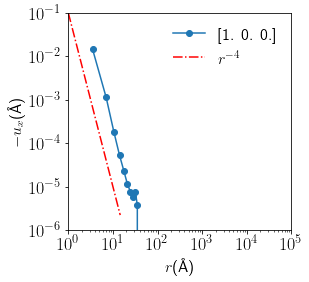

In [94]:
if not eval(confParser['flags']['RemoteMachine']):

    #--- decay of local pressure
    GetCR( disp.x, disp.y, disp.z, -disp.ux, 
          np.array([[1.0,0.0,0.0]]),
          xlabel=r'$r$(\r{A})',
          ylabel =r'$-u_x$(\r{A})',
          xlim=(1e0,1e5,1e-6,1e-1),
           Logy = True,
           Logx = True,
          alpha=4,
          title='udecay.png'
         )

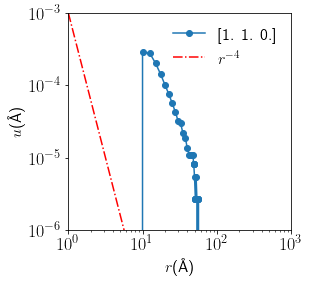

In [97]:
if not eval(confParser['flags']['RemoteMachine']):
    #--- decay of local pressure
    valm=list(map(lambda x: x[0]+x[1],np.c_[disp.ux,disp.uy,disp.uz]* np.array([[1.0,1.0,0.0]])/2**.5))
    GetCR( disp.x, disp.y, disp.z, np.array(valm), 
          np.array([[1.0,1.0,0.0]]),
          xlabel=r'$r$(\r{A})',
          ylabel =r'$u$(\r{A})',
          xlim=(1e0,1e3,1e-6,1e-3),
           Logy = True,
           Logx = True,
          alpha=4,
          title='udecay.png'
         )

## Composition Fluctuations


In [177]:
def plott(sarr,nx,ny,nz,box,zlin, title):
    value = np.c_[sarr].reshape(((ny,nx,nz)))
    CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( box.CellVector ) #--- box length
    #--- xy plane
    zz=0.5*(zlin[-1]+zlin[0])
    dz = zlin[-1]-zlin[-2]
    lz = zlin[-1]-zlin[0]
    nzz=int(nz*(zz-zlin[0])/lz)
    val = value[:,:,nzz].copy()
    #        pdb.set_trace()
    PltBitmap(val, 
              xlabel = r'$x$(\r{A})', ylabel = r'$y$(\r{A})',
              xlim=VectorNorm[0]*np.array([-0.5,0.5]),ylim=VectorNorm[1]*np.array([-0.5,0.5]),
              zscore = True,
              frac = 1.0, #--- plot a patch
              title = title,
              colorbar=True,
            )
    
    
def GetComp( atoms, atomf ):
    #--- different types
    types = set(atomf.type)
    c={}
    n = len(atoms.x)
    
    return dict(zip(types,list(map(lambda x:1.0*np.sum(atoms.type == x)/n,types))))
#    for typei in types:
#        c[typei] = 1.0*np.sum(atoms.type == typei)/n
#
#    return c


def GetPressComp( atoms,box, dmean, **kwargs ):
    #--- grid: tiling mapped box with original size
    (xlin, ylin, zlin), (xv, yv, zv) = lp.GetCubicGrid( box.CellOrigin, 
                                                     box.CellVector, 
                                                     dmean,
                                                     margin = 0.0 * dmean, odd = False )
    xi = np.array(list(zip(xv.flatten(), yv.flatten(), zv.flatten())))
    dvol = (xlin[1]-xlin[0])*(ylin[1]-ylin[0])*(zlin[1]-zlin[0])
    (ny,nx,nz) = xv.shape
    print(xv.shape)
#     nx -= 1
#     ny -= 1
#     nz -= 1
    assert nx*ny*nz >= 8, 'decrease division length!'
    #--- indices
    (xvi, yvi, zvi) = np.meshgrid(np.arange(0,nx),np.arange(0,ny),np.arange(0,nz))
    indices = np.array(list(zip(xvi.flatten(), yvi.flatten(), zvi.flatten()))) #--- shape:(ncel,3)
    indices = list(map(lambda x: tuple(x),indices))

    #--- partition box & assign index to each atom
    wrap = lp.Wrap(atoms,box)
    wrap.WrapCoord() #--- wrap inside
    wrap.Set(atoms)
    assert np.sum(wrap.isInside()) == len(atoms.x)
    wrap.GetDimensionlessCords()
    AtomCellId = (wrap.beta * np.array([nx,ny,nz])).astype(int)
    #--- store in a df
    df = pd.DataFrame(np.c_[pd.DataFrame(atoms.__dict__),AtomCellId],
                         columns=list(pd.DataFrame(atoms.__dict__).keys())+['ix','iy','iz'])
    df['ix']=df['ix'].astype(int)
    df['iy']=df['iy'].astype(int)
    df['iz']=df['iz'].astype(int)
#    display(df.head())

    #--- group & compute p and c
    d = df.groupby(by=['ix','iy','iz']).groups
#     print(len(d))
    if 'MODU' in kwargs and kwargs['MODU']:
        assert len(d) == nx*ny*nz, 'empty boxes!'
    #--- lambda function: compute p 
    f = lambda x: np.sum(np.sum(np.array(x.sxx)+np.array(x.syy)+np.array(x.szz)))*(-1.0e-4/3.0/dvol)
    vol=np.linalg.det(box.CellVector)
    #
    
    keys = indices if 'MODU' in kwargs and kwargs['MODU'] else d.keys()
#    pdb.set_trace()

    #--- subset of cells
    if 'ncmax' in kwargs:
        ncell = len(keys)
#        assert ncell == nx * ny * nz, '%s != %s'%(ncell,nx * ny * nz)
        keys = list(keys)[0:np.min([ncell,kwargs['ncmax']])]
    print('dmean=',dmean,len(keys))

    plist = np.zeros(len(keys)) #list(map(lambda x:f(df.iloc[d[x]]),keys)) #--- len(plist) = ncell
    clist = list(map(lambda x:GetComp(df.iloc[d[x]],atoms),keys)) #--- clist[icell]={1:c1,2:c2, ...}
    
    #---
    if 'PLOT' in kwargs and kwargs['PLOT']:
        plott(plist,nx,ny,nz,box,zlin, 'pCG.png')
    
    
    #--- read file: elastic constants
    if 'MODU' in kwargs and kwargs['MODU']:
        fileName = kwargs['PATH']
        modu = pd.read_csv(fileName, sep=' ',header=0)
#        display(modu.head())
        if 'PLOT' in kwargs and kwargs['PLOT']:
            plott(modu['C66'],nx,ny,nz,box,zlin, 'muCG.png')

    #--- plot
    #--- reshape value


        
#        display(modu.head())
    if 'MODU' in kwargs and kwargs['MODU']:
        mlist = modu['C66'].to_list()
        return clist, plist, mlist
    else:
        return clist, plist


### partition

In [231]:
if eval(confParser['flags']['PressFluc']):
    #--- length scales
    nn=[list(set(np.logspace(5,1,8,base=2,dtype=int))),
        list(set(np.logspace(6,1,32,base=2,dtype=int))),
        list(set(np.logspace(6,1,16,base=2,dtype=int)))
       ][ 1 ]
    nn.sort()

    #clist, plist = GetPressComp( atoms,box, 20.0 )
    #--- partition
    box = lp.Box( BoxBounds = lmpData.BoxBounds[itime],AddMissing = np.array([0.0,0.0,0.0] ) )

    rsub = np.array([
            [53.7],
            list(map(lambda x: box.CellVector[0,0]/x,nn))
           ][1])
    rsub = rsub[rsub>3.0] #--- r>r_nearest 
    print('rsub=',rsub)
    
    # #--- composition and pressure fluctuations
#    t0 = time.time()
    ncmax=1000
#    cplist = list(map(lambda x: GetPressComp( atoms,box, x, ncmax=ncmax ), rsub))
#    print('partitioning %s'%(time.time()-t0))



rsub= [53.7260776  35.81738506 26.8630388  21.49043104 17.90869253 15.35030788
 13.4315194  11.93912835 10.74521552  9.76837774  8.2655504   7.67515394
  6.7157597   5.96956418  5.37260776  4.67183283  4.1327752   3.70524673
  3.35787985]


#### multiple realizations

In [232]:
if eval(confParser['flags']['PressFluc']):
    nevery = int(confParser['parameters']['nevery'])
    times = np.array(list(lmpData.coord_atoms_broken.keys()))
    times = times[ times > 0 ][::nevery] #--- equilibration
    #
    atoml = list(map( lambda x:lp.Atoms( **lmpData.coord_atoms_broken[x].to_dict(orient='series')), times))
    atomd = dict(zip(times,atoml)) #--- dict: key=time val=atom object
    #
    boxl = list(map(lambda x:lp.Box( BoxBounds = lmpData.BoxBounds[x], AddMissing = np.array([0.0,0.0,0.0] )), times ))
    boxd = dict(zip(times,boxl))
    #--- attributes for modulus calculatiuons
    args = {
             'PLOT': False,
    #          'MODU':True, 
    #          'PATH':'%s/ElasticConst.txt'%path
           }
    cplist = [list(map(lambda x: 
              GetPressComp(atomd[x],
                           boxd[x], 
                           y,
                           ncmax=ncmax,
                           PATH = '%s/git/HeaDef/lammpsRuns/NiCoCrNatom100KAnnealedT600Elastic%s/Run0/ElasticConst.txt'%(path,2), **args  ), 
                       times)) 
              for y, indxx in zip(rsub,range(len(rsub)))]
    t0 = time.time()
    cplist = dict(zip(rsub,cplist)) #--- dict: key=length val=cp list
    print('partitioning all timesteps: %s'%(time.time()-t0))


(3, 2, 2)
dmean= 53.726077595715374 12
(4, 3, 3)
dmean= 35.81738506381025 36
(5, 4, 4)
dmean= 26.863038797857687 80
(6, 5, 5)
dmean= 21.49043103828615 150
(7, 6, 6)
dmean= 17.908692531905125 252
(8, 7, 7)
dmean= 15.350307884490107 392
(9, 8, 8)
dmean= 13.431519398928844 576
(10, 9, 9)
dmean= 11.939128354603417 810
(11, 10, 10)
dmean= 10.745215519143075 1000
(12, 11, 11)
dmean= 9.768377744675522 1000
(14, 13, 13)
dmean= 8.265550399340826 1000
(15, 14, 14)
dmean= 7.675153942245053 1000
(17, 16, 16)
dmean= 6.715759699464422 1000
(19, 18, 18)
dmean= 5.9695641773017085 1000
(21, 20, 20)
dmean= 5.372607759571538 1000
(24, 23, 23)
dmean= 4.671832834410033 1000
(27, 26, 26)
dmean= 4.132775199670413 1000
(30, 29, 29)
dmean= 3.7052467307389914 1000
(33, 32, 32)
dmean= 3.357879849732211 1000
partitioning all timesteps: 2.002716064453125e-05


In [233]:
def Concat(cplist):
    cp={}
    for key in cplist:
#         pdb.set_trace()
        value = reduce(lambda x, y: x+y, list(map(lambda x:list(x[1]),cplist[key]))) #--- concat press.
        valc  = reduce(lambda x, y: x+y, list(map(lambda x:list(x[0]),cplist[key]))) #--- concat press.
        try:
            val2 = reduce(lambda x, y: x+y, list(map(lambda x:list(x[2]),cplist[key]))) #--- concat mu.
        except:
            pass
        try:
            cp[key]=[valc,value,val2]
        except:    
            cp[key]=[valc,value]
    return cp

if eval(confParser['flags']['PressFluc']):
    cpdic = Concat(cplist) #--- cpdic[key] = [c,p]

#### pdf

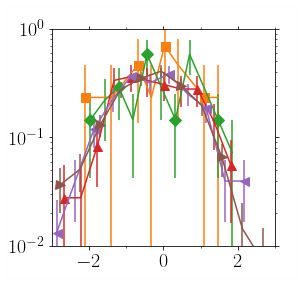

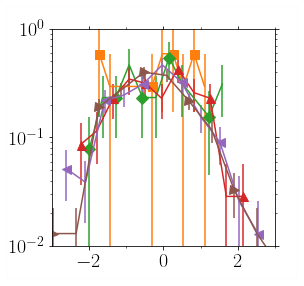

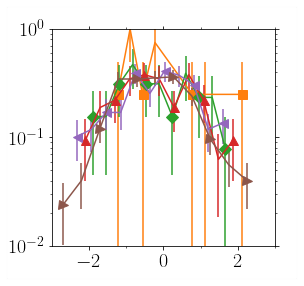

In [234]:
if eval(confParser['flags']['PressFluc']):
    #--- plots
    ax1=utl.PltErr(None,None,Plot=False)
    ax2=utl.PltErr(None,None,Plot=False)
    ax3=utl.PltErr(None,None,Plot=False)

    #--- cf length
    rs=list(cpdic.keys())
    nr=len(rs)

    #--- types
    ni_id=1
    co_id=2
    cr_id=3

    std1 = {}
    std2 = {}
    std3 = {}
    for r, indxx in zip(rs,range(0,nr,4)):
        std1[indxx] = list(map(lambda x:x[ni_id],cpdic[r][0])) #--- local ni concentrations
        std2[indxx] = list(map(lambda x:x[co_id],cpdic[r][0]))
        std3[indxx] = list(map(lambda x:x[cr_id],cpdic[r][0]))

        #--- histograms
        hist1, edges1, error1 = GetPDF( (std1[indxx]-np.mean(std1[indxx]))/np.std(std1[indxx]), 
                                     linscale = True, 
                                     n_per_decade=12,
                                     density = True,
                                                )
        hist2, edges2, error2 = GetPDF( (std2[indxx]-np.mean(std2[indxx]))/np.std(std2[indxx]), 
                                     linscale = True, 
                                     n_per_decade=12,
                                     density = True,
                                                )
        hist3, edges3, error3 = GetPDF( (std3[indxx]-np.mean(std3[indxx]))/np.std(std3[indxx]), 
                                     linscale = True, 
                                     n_per_decade=12,
                                     density = True,
                                                )
        ax1=utl.PltErr(edges1,hist1,
                       yerr=error1,
                        markevery=2,markersize=9,
                        yscale='log',
                        xscale='linear',
            #            xstr='r',
            #            ystr='Std./Mean',
                        Plot=False,
                        ax=ax1,
                        ylim=(1e-2,1e0),
                        xlim=(-3,3),
                        title='PressFluc/pdfNiLocalConcentration.png',
                        DrawFrame=[0.2,0.1,0.15,0.1,0.01],

              )
        ax2=utl.PltErr(edges2,hist2,
                       yerr=error2,
                        markevery=2,markersize=9,
                        yscale='log',
                        xscale='linear',
            #            xstr='r',
            #            ystr='Std./Mean',
                        Plot=False,
                        ax=ax2,
                        ylim=(1e-2,1e0),
                        xlim=(-3,3),
                        title='PressFluc/pdfCoLocalConcentration.png',
                        DrawFrame=[0.2,0.1,0.15,0.1,0.01],

              )
        ax3=utl.PltErr(edges3,hist3,
                       yerr=error3,
                        markevery=2,markersize=9,
                        yscale='log',
                        xscale='linear',
            #            xstr='r',
            #            ystr='Std./Mean',
                        Plot=False,
                        ax=ax3,
                        ylim=(1e-2,1e0),
                        xlim=(-3,3),
                        title='PressFluc/pdfCrLocalConcentration.png',
                        DrawFrame=[0.2,0.1,0.15,0.1,0.01],

              )


#### variance

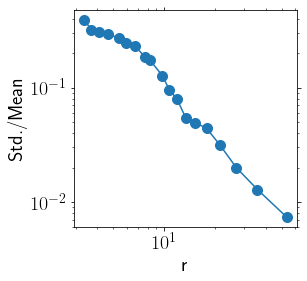

In [184]:
if eval(confParser['flags']['PressFluc']):
    rs=list(cpdic.keys())
    nr=len(rs)

    ni_id=1
    co_id=2
    cr_id=3

    std1 = np.zeros(nr)
    std2 = np.zeros(nr)
    std3 = np.zeros(nr)
    for r, indxx in zip(rs,range(nr)):
        std1[indxx] = np.std(list(map(lambda x:x[ni_id],cpdic[r][0])))
        std2[indxx] = np.std(list(map(lambda x:x[co_id],cpdic[r][0])))
        std3[indxx] = np.std(list(map(lambda x:x[cr_id],cpdic[r][0])))

    np.savetxt('PressFluc/concentration_r.txt',np.c_[rs,std1,std2,std3],header='r\tstdNi\tstdCo\tstdCr')
    PltErr(rs,std1,
        yscale='log',
        xscale='log',
        xstr='r',
        ystr='Std./Mean',
        title='PressFluc/var.png'

          )

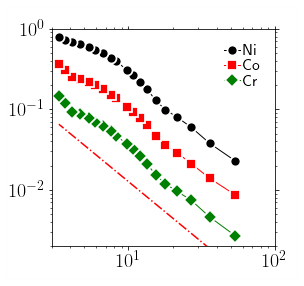

In [370]:
if eval(confParser['flags']['PressFluc']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    #--- plot
    symbols=Symbols()
    lg = Legends()
    lg.Set(fontsize=16,
#           bbox_to_anchor=(0.5,0.4,0.5,0.5),
          )

    
    pathh = {1:'NiCoCrNatom100KTemp800RhoFlucRss/Run0',
             2:'NiCoCrNatom100KTemp400RhoFluc/Run0'
            }[2]
    rs,std1,std2,std3 = np.loadtxt('%s/PressFluc/concentration_r.txt'%pathh).T
    #
    ax=PltErr(rs,2*std1,
        Plot=False,
        attrs=symbols.GetAttrs(count=0,label='Ni')
          )
    PltErr(rs,1.2*std2,
        Plot=False,
        ax=ax,
        attrs=symbols.GetAttrs(count=1,label='Co')
          )
    PltErr(rs,0.5*std3,
        Plot=False,
        ax=ax,
        attrs=symbols.GetAttrs(count=2,label='Cr')
          )
    PltErr(rs,0.4/rs**1.5,
          ax=ax,
           attrs={'fmt':'-.r'},
           xlim=(3,100),
           ylim=(2e-3,1),
        yscale='log',
        xscale='log',
#        xstr='$r$',
#        ystr=r'$\sigma$',
        title='PressFluc/varSro.png',
           Plot=True,
        DrawFrame=[0.2,0.1,0.15,0.1,0.01],
           legend=lg.Get(),
          )
    

### Plot
#### Separate

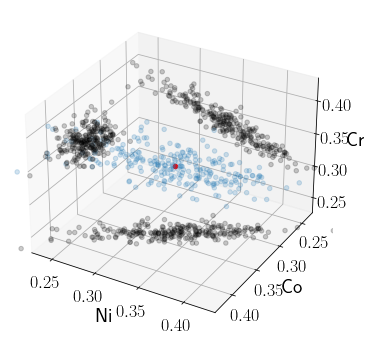

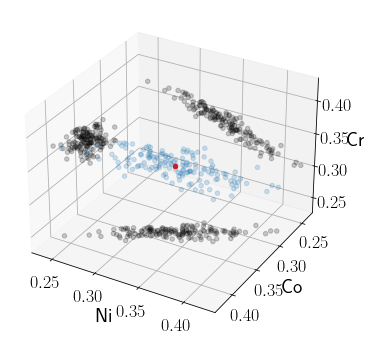

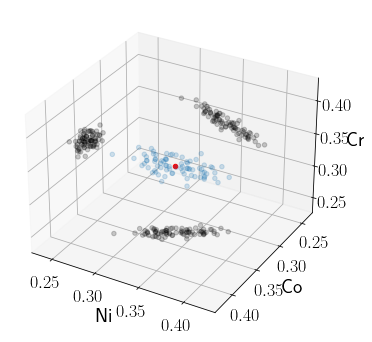

In [250]:
def ScatterPlt3d( clist, plist, 
                 Plot = True,
                 **kwargs ):
    xx = np.array(list(map(lambda x: x[1.0],clist)))
    #
    yy = np.array(list(map(lambda x: x[2.0],clist)))
    #
    zz = np.array(list(map(lambda x: x[3.0],clist))) #plist
    #--- linear fit
    reg = LinearRegression().fit(np.c_[xx,yy], zz)
#     pdb.set_trace()

    if 'zscore' in kwargs and kwargs['zscore']:
        xx = Zscore(xx)
        yy = Zscore(yy)
        zz = Zscore(zz) #plist)

    #--- plot
    if Plot:
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111,projection='3d')
        #
        ax.set_xlabel(r'Ni',fontsize=20)
        ax.set_ylabel(r'Co',fontsize=20)
#        ax.set_zlabel(r'$p$',fontsize=18)
        ax.set_zlabel(r'Cr',fontsize=20)
        #
        ax.tick_params(labelsize=18)
        if 'zscore' in kwargs and kwargs['zscore']:
            sigma=3
            ax.set_xlim(-sigma,sigma)    
            ax.set_ylim(sigma,-sigma)
            ax.set_zlim(-sigma,sigma)
            ax.scatter(0,0,0,c='red')
        elif 'xlim' in kwargs:
            ax.axis(kwargs['xlim'][0:4])    
            ax.set_zlim(kwargs['xlim'][4:])
            ax.scatter(0.33,0.33,0.33,c='red')


        alpha=0.2
        #
        ax.scatter(xx,yy,zz,
                    alpha=alpha,

                  )

        #--- projection
        xflat = np.full_like(xx, min(ax.get_xlim()))
        yflat = np.full_like(yy, min(ax.get_ylim()))
        zflat = np.full_like(zz, min(ax.get_zlim()))
        #
        ax.scatter(xflat, yy, zz,c='black',alpha=alpha)
        ax.scatter(xx, yflat, zz,c='black',alpha=alpha)
        ax.scatter(xx, yy, zflat,c='black',alpha=alpha)
        #
        plt.savefig(kwargs['title'] if 'title' in kwargs else 'scatter.png',
                    dpi=150*2,bbox_inches='tight',pad_inches=0.0)
        plt.show()
    #
    return reg.coef_

if not eval(confParser['flags']['RemoteMachine']):

    # ScatterPlt3d( clist, plist, 
    # #               zscore = True, 
    #              xlim=[0.2,0.4,0.4,0.2],
    #                 Plot = True,
    #             )

    d=0.1
    index_r=8
    coeffs = list(map(lambda x:
                                ScatterPlt3d( cpdic[x[0]][0], cpdic[x[0]][1], 
                                                zscore = False, 
                                              xlim=[0.33-d,.33+d,.33+d,.33-d,0.33-d,.33+d],
                                              Plot = True,
                                              title='PressFluc/scatter3d_%s.png'%(x[1]),
                                            ),    
                                zip([rsub[4],rsub[3],rsub[2]],range(3))
                                ))

In [257]:
[rsub[4],rsub[3],rsub[2]]

[17.908692531905125, 21.49043103828615, 26.863038797857687]

#### Projections

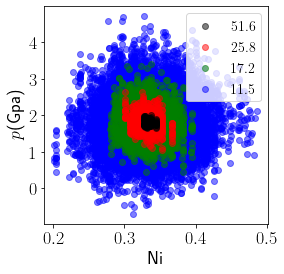

In [377]:
def ScatterPlt2d( clist, plist,
                 ax,
                 color,
                 zorder,
                 rsub=1.0,
                 typee=1.0,
                 Plot = True,
                 **kwargs ):
    xx = np.array(list(map(lambda x: x[typee],clist)))
    #
    zz = plist
    #--- linear fit

    if 'zscore' in kwargs and kwargs['zscore']:
        xx = Zscore(xx)
        zz = Zscore(plist)

    #--- plot
    if Plot:

        if 'zscore' in kwargs and kwargs['zscore']:
            sigma=3
            ax.set_xlim(-sigma,sigma)    
            ax.set_ylim(-sigma,sigma)
        elif 'xlim' in kwargs:
            ax.axis(kwargs['xlim'])    
        alpha=.5
        ax.scatter(xx, zz,c=color,alpha=alpha,marker='o',
                   zorder=zorder, label='$%2.1f$'%rsub,
                  )

if not eval(confParser['flags']['RemoteMachine']):

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    #
    ax.set_xlabel(r'Ni',fontsize=18)
    ax.set_ylabel(r'$p$(Gpa)',fontsize=18)
    #
    ax.tick_params(labelsize=18)
    #
    d=0.3
    dp=1.8
    list(map(lambda x:
            ScatterPlt2d( cpdic[x[0]][0],cpdic[x[0]][1],
    #                    x[0][0], x[0][1],
                         ax,
                         x[1],
                         x[2],
                         rsub=x[0],
                         typee=1.0,
    #                     zscore = True, 
    #                     xlim=[0.33-d,.33+d,1.8-dp,1.8+dp],
                          Plot = True,
                        ),    
    #        zip(cplist,['black','red','green','blue'],[4,3,2,1],[3600, 3800, 4000, 4200])
            zip(rsub,['black','red','green','blue','C0','orange'],[6,5,4,3,2,1])
            ))

    ax.legend(fontsize=14)
    plt.savefig('scatterNi.png',dpi=2*75,bbox_inches='tight')#,pad_inches=0.0)
    plt.show()


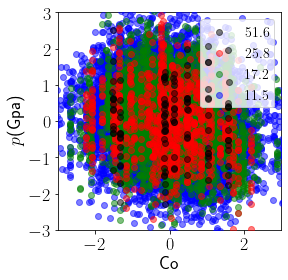

In [379]:
if not eval(confParser['flags']['RemoteMachine']):

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    #
    ax.set_xlabel(r'Co',fontsize=18)
    ax.set_ylabel(r'$p$(Gpa)',fontsize=18)
    #
    ax.tick_params(labelsize=18)
    coeffs = list(map(lambda x:
            ScatterPlt2d( cpdic[x[0]][0],cpdic[x[0]][1],
    #                    x[0][0], x[0][1],
                         ax,
                         x[1],
                         x[2],
                         rsub=x[0],
                         typee=2.0,
                         zscore = True, 
    #                     xlim=[0.33-d,.33+d,1.8-dp,1.8+dp],
                          Plot = True,
                        ),    
    #        zip(cplist,['black','red','green','blue'],[4,3,2,1],[3600, 3800, 4000, 4200])
            zip(rsub,['black','red','green','blue','C0','orange'],[6,5,4,3,2,1])
                                ))
    ax.legend(fontsize=14)
    plt.savefig('scatterCo.png',dpi=2*75,bbox_inches='tight')#,pad_inches=0.0)
    plt.show()


#### altogether

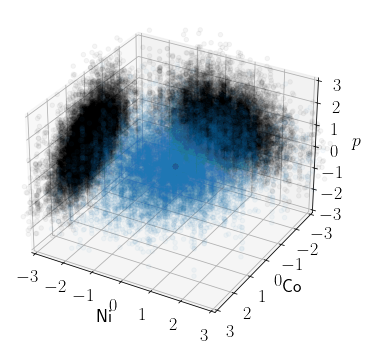

In [382]:
def ScatterPlt3d( clist, plist,
                 ax,
                 color,
                 zorder,
                 Plot = True,
                 **kwargs ):
    xx = np.array(list(map(lambda x: x[1.0],clist)))
    #
    yy = np.array(list(map(lambda x: x[2.0],clist)))
    #
    zz = plist
    #--- linear fit
    reg = LinearRegression().fit(np.c_[xx,yy], zz)
#     pdb.set_trace()

    if 'zscore' in kwargs and kwargs['zscore']:
        xx = Zscore(xx)
        yy = Zscore(yy)
        zz = Zscore(plist)

    #--- plot
    if Plot:

        if 'zscore' in kwargs and kwargs['zscore']:
            sigma=3
            ax.set_xlim(-sigma,sigma)    
            ax.set_ylim(sigma,-sigma)
            ax.set_zlim(-sigma,sigma)
            ax.scatter(0,0,0,c='red')
        elif 'xlim' in kwargs:
            ax.axis(kwargs['xlim'])    
    #         ax.set_ylim(ax.axis()[3],ax.axis()[2])

        alpha=kwargs['alpha'] if 'alpha' in kwargs else .1
        #
        ax.scatter(xx,yy,zz,
                    alpha=alpha,
                   color='C0'

                  )

        #--- projection
        xflat = np.full_like(xx, min(ax.get_xlim()))
        yflat = np.full_like(yy, min(ax.get_ylim()))
        zflat = np.full_like(zz, min(ax.get_zlim()))
        
        ax.scatter(xflat, yy, zz,c=color,alpha=alpha,zorder=zorder)
        ax.scatter(xx, yflat, zz,c=color,alpha=alpha,zorder=zorder)
        #
    #
    return reg.coef_

if not eval(confParser['flags']['RemoteMachine']):

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111,projection='3d')
    #
    ax.set_xlabel(r'Ni',fontsize=18)
    ax.set_ylabel(r'Co',fontsize=18)
    ax.set_zlabel(r'$p$',fontsize=18)
    #
    ax.tick_params(labelsize=18)
    #
    #ax.set_title(r'$r=%s$ \r{A}, $T=%s^\circ K$'%(17,300),fontsize=18)
    #
    coeffs = list(map(lambda x:
                                ScatterPlt3d( cpdic[x[0]][0], cpdic[x[0]][1],
                                             ax,
                                             'black',#x[1],
                                             1,#x[2],
                                                zscore = True, 
    #                                          xlim=[0.2,0.4,0.4,0.2],
                                              Plot = True,
                                             alpha=0.04,
                                            ),    
                                zip(rsub,range(len(rsub)))
                                ))

    plt.savefig('scatter.png',dpi=2*75,bbox_inches='tight',pad_inches=0.0)
    plt.show()


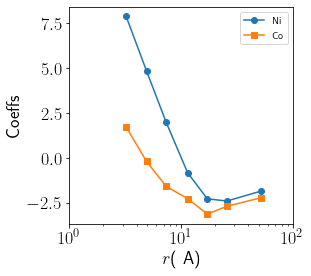

In [127]:
if not eval(confParser['flags']['RemoteMachine']):

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.set_xscale('log')
    ax.set_xlim(1e0,1e2)
    ax.tick_params(labelsize=18)
    ax.set_xlabel('$r$(\r{A})',fontsize=18)
    ax.set_ylabel('Coeffs',fontsize=18)
    #
    ax.plot(rsub,np.array(coeffs)[:,0],'-o',label='Ni')
    ax.plot(rsub,np.array(coeffs)[:,1],'-s',label='Co')

    ax.legend()
    plt.show()

# Neighbor list

In [82]:
if eval(confParser['flags']['NeighList']):
    natoms = eval(confParser['neigh list']['natom']) #--- subset of atoms
    cutoff = eval(confParser['neigh list']['cutoff'])
    if eval(confParser['neigh list']['WritDisc']) and not eval(confParser['neigh list']['ReadDisc']):
        try:
            !rm neighList.xyz
        except:
            pass
        path = confParser['input files']['path']
        indx = confParser['input files']['fileIndex']
        fileName = '%s/%s'%(path,confParser['input files']['filename'].split()[int(indx)])
        nevery = int(confParser['parameters']['nevery'])
        t0=time.time()
        !ovitos OvitosCna.py $fileName neighList.xyz $nevery 4 $cutoff $natoms
        print('output neighbor list=%s s'%(time.time()-t0))


InputFile= /Users/Home/Desktop/Tmp/txt/git/HeaDef/lammpsRuns/AmirData/shengAnnealed/Temp600/dislocated/Run0//Swapped_600_edge.dump
num_frames= 2
frame=0
frame=1
output neighbor list=89.87584090232849 s


In [83]:
if eval(confParser['flags']['NeighList']):
    t0=time.time()
    lmpNeigh = lp.ReadDumpFile( 'neighList.xyz' )
    lmpNeigh.GetCords( ncount = sys.maxsize)
    print('load neighbor list=%s s'%(time.time()-t0))
    print('times=',lmpNeigh.coord_atoms_broken.keys())
    display(lmpNeigh.coord_atoms_broken[0].head())

reached end of file!
load neighbor list=156.31645107269287 s
times= dict_keys([0, 10000])


,id,type,J,Jtype,DIST,DX,DY,DZ,PBC_SHIFT_X,PBC_SHIFT_Y,PBC_SHIFT_Z
0,1,3,262227.0,1.0,19.46566,10.221480,16.27610,-3.085732,0.0,0.0,0.0
1,1,3,9580.0,3.0,10.52514,-8.957962,2.03227,5.138412,-1.0,0.0,1.0
2,1,3,9582.0,2.0,11.13064,-8.957962,0.00000,6.606522,-1.0,0.0,1.0
3,1,3,9573.0,2.0,14.46262,-12.633970,3.99553,5.795321,-1.0,0.0,1.0
4,1,3,9575.0,2.0,14.63146,-11.539960,3.98106,8.065982,-1.0,0.0,1.0


# Order parameter
## 2d map

In [84]:
!mkdir orderParameter

mkdir: orderParameter: File exists


In [85]:
def GridSize(box0, cutoff, dr):
    lx=2*cutoff #box0.CellVector[0,0]
    ly=2*cutoff #box0.CellVector[1,1]
    lz=2*cutoff #box0.CellVector[2,2]
    nx = int(lx/dr)
    ny = int(ly/dr)
    nz = int(lz/dr)
    if nx % 2 == 0:
        nx+=1
    if ny % 2 == 0:
        ny+=1
    if nz % 2 == 0:
        nz+=1
    print('grid size=',nx,ny,nz)
    return (ny,nx,nz), [(-0.5*ly,0.5*ly),(-0.5*lx,0.5*lx),(-0.5*lz,0.5*lz)]


def GetHistd(df, rangee, pair):
    (typei,typej) = pair
    print('pair=',pair)
    #--- filter
    indx = np.all([df.type==typei,df.Jtype==float(typej)], axis=0)
#    display(df[indx])
    #--- binning
    r = np.c_[df[indx][['DX','DY','DZ']]]
    H, edges = np.histogramdd(r, bins = (ny, nx, nz), range=rangee)
    print('H.shape=',H.shape) #, edges[0].size, edges[1].size, edges[2].size
#    assert not np.any(H == 0.0), 'increase bin size!'
    return H


def GetPairProb(df, pairs, rangee ):
#     pair=(2,2)
#     H = GetHistd(
#                     lmpNeigh.coord_atoms_broken[0],
#                     rangee,
#                     pair
#                 )

    H = list(map(lambda x: GetHistd( df, rangee, x),pairs))
    probt = reduce(lambda x, y: x+y, H ) #--- sum
    prob = map(lambda x:H[x]/probt,range(len(pairs)))

    return dict(zip(pairs,list(prob)))


## radial part
### RDF

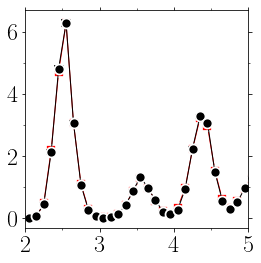

In [86]:
def Wrapper(lmpNeigh,lmpData,itime):
    box = lp.Box( BoxBounds = lmpData.BoxBounds[itime], AddMissing = np.array([0.0,0.0,0.0] ))
    atoms = lp.Atoms( **lmpData.coord_atoms_broken[itime].to_dict(orient='series') )
    neigh = lmpNeigh.coord_atoms_broken[itime]


    rdf = lp.ComputeRdf(  atoms, box )
    rdf.PairCrltn(  
                  bins=np.arange(0.0,cutoff,0.1), 
                  rlist=neigh.DIST,
                  regular_r = True,
                  )
    return rdf.Get()


if eval(confParser['flags']['SroParameter']):
    itime=list(lmpNeigh.coord_atoms_broken.keys())[-1]
    bin_edges1, hist1, err1 = Wrapper(lmpNeigh,lmpData,itime)
    bin_edges0, hist0, err0 = Wrapper(lmpNeigh,lmpData,0)
    #--- plot
    symbols=Symbols()
    ax = PltErr(bin_edges1,hist1,err1,
          xlim=[2,5],
                        attrs=symbols.GetAttrs(count=0,zorder=2),      

                Plot=False,
#                xscale='log',
          )

    PltErr(bin_edges0,hist0,err0,
          xlim=[2,5],
    #       ystr='$g(r)$',
    #       xstr='$r$',
           title='orderParameter/gr_sheng.png',
                        attrs=symbols.GetAttrs(count=1,zorder=1),      
                Plot=True,
           ax=ax,
    #        DrawFrame=[0.2,0.1,0.15,0.1,0.1],
           fontsize=24,
#                xscale='log',
          )

#### fit a spline

In [87]:
def ReturnShapeFunc(x,df):
    transformed_x = patsy.bs(x, df=df,degree =3, include_intercept=False)
    return transformed_x 

def TrainModel(x,y):
    reg = LinearRegression().fit(x, y )
    return reg
def Validate(reg, x,y,
             deg_f=np.arange(0,90,5), #np.logspace(0.0,8.0,9,base=2).astype(int),
             cv_samples=10):
    mse={}
    for df in deg_f:
#    for df in map(int,np.logspace(0,12,20,base=2,endpoint=True)):
        try:
            transfrm = ReturnShapeFunc(x,df)
            #--- vadidate    
            scores = cross_validate(reg,  transfrm, y, cv=cv_samples,
                                         scoring=('r2', 'neg_mean_squared_error'),
                                         return_train_score=True)
            mse[df] = np.mean(scores['train_neg_mean_squared_error'])
        except:
            continue
    return mse


# #--- training points
# transfrm = ReturnShapeFunc(bin_edges1,50)
    
# #--- train
# reg = TrainModel(transfrm,np.c_[hist1])

# #--- prediction
# y_pred = reg.predict( transfrm )


# #--- plot
# ax = PltErr(bin_edges1,hist1,err1,
#       xlim=[2,cutoff],
#         attrs={
#                'fmt':'o',
#                'color':'black',
#                'markerfacecolor':'white',
#                'zorder':1,
#               },
#             Plot=False
#       )

# PltErr(bin_edges1,y_pred,
#       xlim=[2,cutoff],
# #       ystr='$g(r)$',
# #       xstr='$r$',
# #       title='orderParameter/gr_sheng.png',
#                 attrs={#'label':r'$\mathrm{without~annealing}$',
#                        'fmt':'-',
#                        'markersize':9,
#                        'markevery':1,
#                        'color':'red',
#                'zorder':2,
#                       },
#             Plot=True,
#        ax=ax,
# #        DrawFrame=[0.2,0.1,0.15,0.1,0.1],
#        fontsize=24,
#       )

In [140]:
# mse = Validate(reg, bin_edges1,np.c_[hist1])
# try:
#     keys=mse.keys()
#     plt.scatter(keys, [-mse[key] for key in keys],marker='x')
#     plt.yscale('log')
# #    plt.xscale('log')
# #    plt.ylim(1e-5,1e-2)
# #    plt.savefig('cv.png',dpi=75,bbox_inches='tight')
#     plt.show()
# except:
#     pass

#### 2nd method

peaks of g(r) at:r= [ 2.53163065  3.55327354  4.39098757  5.05237959  5.64642889  6.24623625
  6.71438151  7.61432539  8.02817507  8.43132904  9.11836658  9.82110496
 10.48466477 11.0477044  11.64432188 11.9799347  12.72312119 13.20338853
 14.1794066  14.62346837 15.39473169 16.64450935 17.01989533 17.60496396
 18.81904577 19.34444348]
valleys of g(r) at:r= [ 0.          3.07599452  3.93027174  4.75254758  5.31739377  6.02621419
  6.33247324  7.18267086  7.91339268  8.21963832  8.59219371  9.48163363
 10.10635798 10.66291953 11.49837568 11.83766743 12.33015782 12.88957117
 13.73097925 14.34081576 14.94497094 15.86508868 16.95684538 17.27597846
 18.00742473 19.07467044 19.62497388]


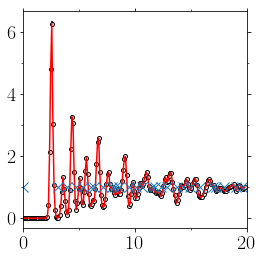

In [88]:
def quadratic_spline_roots(spl):
    roots = []
    knots = spl.get_knots()
    for a, b in zip(knots[:-1], knots[1:]):
        u, v, w = spl(a), spl((a+b)/2), spl(b)
        t = np.roots([u+w-2*v, w-u, 2*v])
        t = t[np.isreal(t) & (np.abs(t) <= 1)]
        roots.extend(t*(b-a)/2 + (b+a)/2)
    return np.array(roots)

def GetExtrema(bin_edges1,hist1,r0,verbose=True):
    y_axis=hist1
    x_axis=bin_edges1
    f = InterpolatedUnivariateSpline(x_axis, y_axis, k=4)
    
    ext=f.derivative().roots() #--- roots
    spl_dd=f.derivative().derivative()
    valleys=ext[np.all([spl_dd(ext)>0,ext>r0],axis=0)]
    peaks=ext[np.all([spl_dd(ext)<0,ext>r0],axis=0)]


#     cr_pts = quadratic_spline_roots(f.derivative())
#     cr_pts = np.append(cr_pts, (x_axis[0], x_axis[-1]))  # also check the endpoints of the interval
#     cr_pts = cr_pts[cr_pts>r0]
#     ddf=f.derivative().derivative()
#     peaks = np.sort(cr_pts[ddf(cr_pts)<0.0])
#     valleys = np.sort(cr_pts[ddf(cr_pts)>0.0])
    rpeak   = peaks[0]
    rvalley = valleys[0]
    if rvalley > rpeak:
        valleys = np.concatenate([np.array([0]),valleys])
    if verbose:
        print('peaks of g(r) at:r=',peaks)
        print('valleys of g(r) at:r=',valleys)
    
    return x_axis, f, valleys


from scipy.interpolate import InterpolatedUnivariateSpline

if eval(confParser['flags']['SroParameter']):

    x_axis, f, valleys = GetExtrema(bin_edges1,hist1,2.3)
    
    #--- plot
    ax = PltErr(bin_edges1,hist1,err1,
            attrs={
                   'fmt':'o',
                   'color':'black',
                   'markerfacecolor':'white',
                   'markersize':4,
                   'zorder':1,
                  },
                Plot=False
          )

    PltErr(x_axis,f(x_axis),
          xlim=[0,cutoff],
    #       ystr='$g(r)$',
    #       xstr='$r$',
    #       title='gr_sheng_T800K.png',
                    attrs={#'label':r'$\mathrm{without~annealing}$',
                           'fmt':'-',
                           'markersize':9,
                           'markevery':1,
                           'color':'red',
                   'zorder':2,
                          },
                Plot=False,
           ax=ax,
    #        DrawFrame=[0.2,0.1,0.15,0.1,0.1],
           fontsize=24,
          )
    
    PltErr(valleys,np.ones(len(valleys)),
           ax=ax,
           attrs={'fmt':'x','markersize':10}
          )
 

### WC order parameter

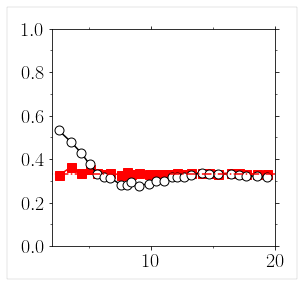

In [89]:
def Wrapper(itime,pairi,pairj,**kwargs):
    box = lp.Box( BoxBounds = lmpData.BoxBounds[itime], AddMissing = np.array([0.0,0.0,0.0] ))
    atoms = lp.Atoms( **lmpData.coord_atoms_broken[itime].to_dict(orient='series') )
    neigh = lmpNeigh.coord_atoms_broken[itime]

    
    rdf = lp.ComputeRdf(  atoms, box )
    bins = np.arange(0.0,cutoff,0.1) if 'bins' not in kwargs else kwargs['bins']
    rdf.PairCrltn(  
                  bins=bins, 
                  rlist=neigh.DIST )
    return rdf.Sro(neigh,pairi,pairj,bins=bins)

    

if eval(confParser['flags']['SroParameter']):
    itime=list(lmpNeigh.coord_atoms_broken.keys())[-1]
    #---
    p0={}
    p1={}
    dp0={}
    dp1={}
    count = 0
    for pairi, pairj in [(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]: #--- different elemental pairs
        bin_edges0, p0[count], dp0[count] = Wrapper(0,pairi,pairj,bins=valleys) #--- rss
        bin_edges1, p1[count], dp1[count] = Wrapper(itime,pairi,pairj,bins=valleys) #--- sro
        count += 1
        
    count = 0
    ax=    PltErr(bin_edges1,p1[count],yerr=dp1[count],
                Plot=False,
                attrs={#'label':r'$\mathrm{with~annealing}$',
                       'fmt':'-o',
                       'markersize':9,
                       'markevery':1,
                       'color':'black',
                       'markerfacecolor':'white',
                       'zorder':2,
                      },
              )
    
    ax = PltErr(bin_edges0,p0[count],yerr=dp0[count],
               ax=ax,
                Plot=False,
                attrs={#'label':r'$\mathrm{without~annealing}$',
                       'fmt':'-s',
                       'markersize':9,
                       'markevery':1,
                       'color':'red',
                       'zorder':1,
                      }
              )

    PltErr([0,cutoff],[0.33,0.33],
              xlim=[2,cutoff],
              ylim=[0,1],
               ax=ax,
               attrs={'fmt':'-.r'},
#               title='wc_%s%s_farkas_T800K.png'%(pairi,pairj),
#               ystr='$p_{%s%s}(r)$'%(pairi,pairj),
#               xstr='$r$',
#               legend=True,
#               fontsize=18,
           DrawFrame=[0.2,0.1,0.15,0.1,0.1],
              )

#### temporal fluctuations and mean

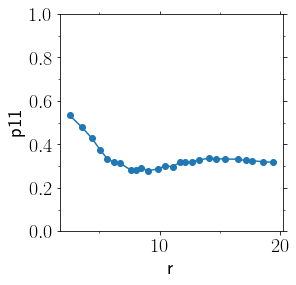

In [90]:
if eval(confParser['flags']['SroParameter']):
    times = list(lmpNeigh.coord_atoms_broken.keys()) #[itime] # #--- list of timesteps
    times.pop(0) #--- exclude 0
    #--- loop over pairs
    count = 0
    data = {}
    p1_mean = {}
    err_p1 = {}
    for pairi, pairj in [(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]:
        data[count] = np.c_[list(map(lambda x:Wrapper(x,pairi,pairj,bins=valleys)[1],times))].T #--- data corresponding to different times
        p1_mean[count] = np.mean(data[count],axis=1) #--- mean
        err_p1[count] = ((np.mean(data[count]*data[count],axis=1) - p1_mean[count]*p1_mean[count])/len(times))**0.5

        #--- print
        np.savetxt('orderParameter/pr_annealed_ij_index%s.txt'%count,
                   np.c_[bin_edges1,p1_mean[count],err_p1[count]],
                   header='r\tp\terr_p')
        np.savetxt('orderParameter/pr_non_annealed_ij_index%s.txt'%count,
                   np.c_[bin_edges0,p0[count],dp0[count]],
                   header='r\tp\terr_p')
        count += 1
    #--- plot
    count = 0
    for indxx in range(data[count].shape[1]):
        kwargs={} if indxx == 0 else {'ax':ax}
        ax = PltErr(bin_edges1, data[count][:,indxx],
                    Plot=False,
                    xstr='r',
                    ystr='p11',
                    ylim=[0,1],
                    attrs={'fmt':'-o'},
                   **kwargs,
                  )

#### average

pair 1 1


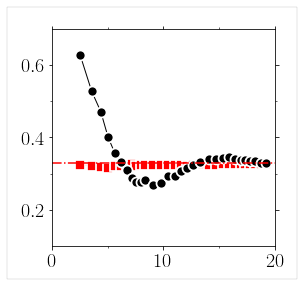

pair 1 2


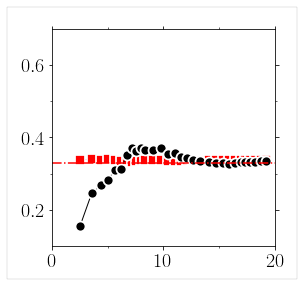

pair 1 3


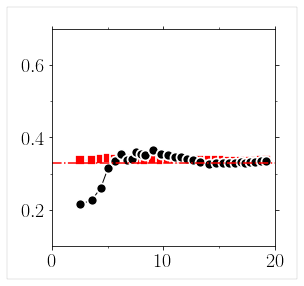

pair 2 2


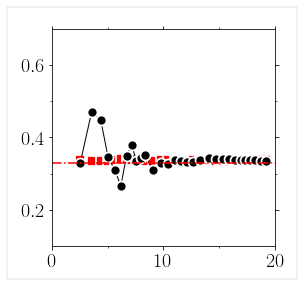

pair 2 3


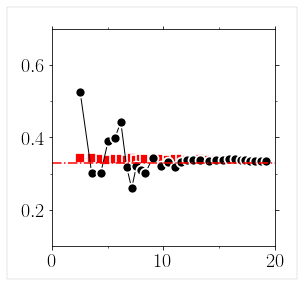

pair 3 3


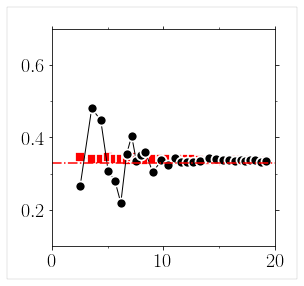

In [277]:
if eval(confParser['flags']['SroParameter']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    #--- plot
    symbols=Symbols()

    
    count = 0
    p0={}
    p1={}
    dp0={}
    dp1={}
    temp = 400
    pathh = 'NiCoCrNatom100KTemp%ssro/Run0'%temp
    p1_mean = {}
    err_p1 = {}
    for pairi, pairj in [(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]:
        print('pair', pairi, pairj )
#         data[count] = np.c_[list(map(lambda x:Wrapper(x,pairi,pairj)[1],times))].T #--- data corresponding to different times
#         p1_mean[count] = np.mean(data[count],axis=1) #--- mean
#         err_p1[count] = ((np.mean(data[count]*data[count],axis=1) - p1_mean[count]*p1_mean[count])/len(times))**0.5

        #--- print
        bin_edges1,p1_mean[count],err_p1[count] = np.loadtxt('%s/orderParameter/pr_annealed_ij_index%s.txt'%(pathh,count)).T
        bin_edges0,p0[count],dp0[count] = np.loadtxt('%s/orderParameter/pr_non_annealed_ij_index%s.txt'%(pathh,count)).T
        
        
        #--- plot
        ax=    PltErr(bin_edges1,p1_mean[count],yerr=err_p1[count],
                    Plot=False,
                        attrs=symbols.GetAttrs(count=0,zorder=2),      
                  )

        ax = PltErr(bin_edges0,p0[count],yerr=dp0[count],
                   ax=ax,
                    Plot=False,
                        attrs=symbols.GetAttrs(count=1,zorder=1),      
                  )

        PltErr([0,cutoff],[0.33,0.33],
                  xlim=[0,cutoff],
                  ylim=[0.1,.7],
                   ax=ax,
                   attrs={'fmt':'-.r'},
                   title='orderParameter/wc_%s%s_sheng.png'%(pairi,pairj),
        #               ystr='$p_{%s%s}(r)$'%(pairi,pairj),
        #               xstr='$r$',
        #               legend=True,
        #               fontsize=18,
               DrawFrame=[0.2,0.1,0.15,0.1,0.1],
                  )
        count += 1

#### difference

pair 1 1


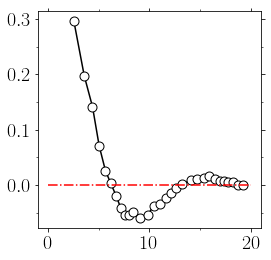

pair 1 2


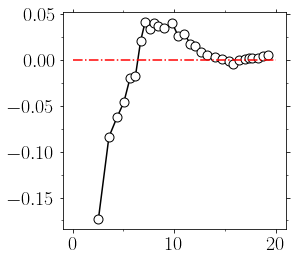

pair 1 3


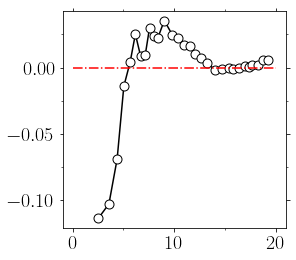

pair 2 2


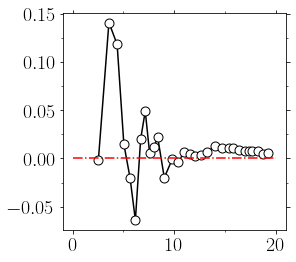

pair 2 3


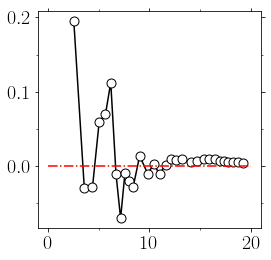

pair 3 3


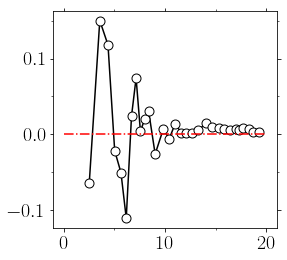

In [278]:
if eval(confParser['flags']['SroParameter']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    #--- loop over elemental pairs
    count = 0
    rpeak = 2.5
    for pairi, pairj in [(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]:
        print('pair',pairi,pairj)
        
        p0[count] = 0.33 #--- equi-molar 
        
        #--- plot difference
        ax=PltErr(bin_edges1,p1_mean[count]-p0[count],
                        Plot=False,
                        attrs={#'label':r'$\mathrm{with~annealing}$',
                               'fmt':'-o',
                               'markersize':9,
                               'markevery':1,
                               'color':'black',
                               'markerfacecolor':'white',
                               'zorder':2,
                              },
                      )
        
        #--- plot base line
        PltErr([0,cutoff],[0.0,0.0],
 #         xlim=[0,cutoff],
 #         ylim=[0.1,.7],
           ax=ax,
           attrs={'fmt':'-.r'},
#           title='orderParameter/wc_%s%s_sheng.png'%(pairi,pairj),
#               ystr='$p_{%s%s}(r)$'%(pairi,pairj),
#               xstr='$r$',
#               legend=True,
#               fontsize=18,
#       DrawFrame=[0.2,0.1,0.15,0.1,0.1],
          )
        
        
        #--- save delta_p
#        filtr = np.all([~np.isnan(p1_mean[count]-p0[count]),bin_edges1>rpeak],axis=0)
#        val=(p1_mean[count]-p0[count]) #[filtr]
#        r_sro = bin_edges1[filtr][val<0.0][0]
#        print('sro size=',r_sro)
#        np.savetxt('%s/orderParameter/sroSize_ij_index%s.txt'%(pathh,count),np.c_[temp,r_sro],header='temp\tsize')
        np.savetxt('%s/orderParameter/deltap_r_ij_index%s.txt'%(pathh,count),np.c_[bin_edges1,p1_mean[count]-p0[count]],header='r\tdp')
        count += 1


In [279]:
'%s/orderParameter/deltap_r_ij_index%s.txt'%(pathh,count)

'NiCoCrNatom100KTemp400sro/Run0/orderParameter/deltap_r_ij_index6.txt'

#### multiple Temperature

parse from ./NiCoCrNatom100KTemp400sro/Run0/orderParameter/deltap_r_ij_index5.txt
parse from ./NiCoCrNatom100KTemp600sro/Run0/orderParameter/deltap_r_ij_index5.txt
parse from ./NiCoCrNatom100KTemp800sro/Run0/orderParameter/deltap_r_ij_index5.txt
parse from ./NiCoCrNatom100KTemp1000sro/Run0/orderParameter/deltap_r_ij_index5.txt
parse from ./NiCoCrNatom100KTemp1200sro/Run0/orderParameter/deltap_r_ij_index5.txt
parse from ./NiCoCrNatom100KTemp1400sro/Run0/orderParameter/deltap_r_ij_index5.txt


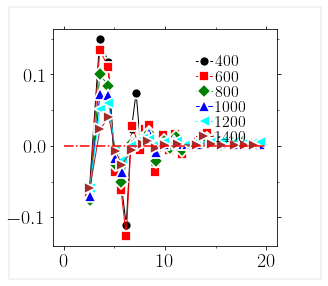

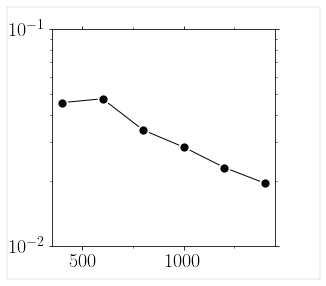

In [332]:
if eval(confParser['flags']['SroParameter']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    indxx = 5 #--- NiNi
    #--- plot order parameter vs. distance
    symbols=Symbols()
    lg = Legends()
    lg.Set(fontsize=16,
           bbox_to_anchor=(0.5,0.4,0.5,0.5),
          )
    ax = utl.PltErr(None,None,Plot=False)
                

    #--- loop over temp
    temps = [400,600,800,1000,1200,1400]
    stdd = np.zeros(len(temps))
    for temp, count in zip(temps,range(10)): #--- T
        pathh = './NiCoCrNatom100KTemp%ssro/Run0/orderParameter/deltap_r_ij_index%s.txt'%(temp,indxx)
        print('parse from %s'%pathh)
        try:
            sarray = np.loadtxt(pathh)
            #--- filter
            filtr = ~np.isnan(sarray[:,1])
            #--- order parameter
            sdata = sarray[filtr]
            xdata = sdata[:,0]
            ydata = sdata[:,1]
            #--- std y
            stdd[count] = np.std( ydata )
            #--- plot
            utl.PltErr(xdata,ydata,
                        Plot=False,
                        attrs=symbols.GetAttrs(count=count,label=r'$%s$'%temp),      
                        ax=ax,
                        )
        
    
            #--- first dip
#            x_axis, f, valleys = GetExtrema(xdata,ydata,2.3,verbose=False)
#            ksi[count] = valleys[1]
#            print('minimum at ',valleys[1])
        except:
            traceback.print_exc()
            continue
            
    #--- plot
    utl.PltErr([0,cutoff],[0,0],
                attrs={'fmt':'-.r'},
                ax=ax,
                Plot=False,
                title='orderParameter/wc_diff_sheng_index%s.png'%indxx,
               legend=lg.Get(),
#               xlim=[2.0,20.0],
#                  ylim=[0.1-0.33,.7-0.33],
            DrawFrame=[0.2,0.2,0.15,0.1,0.1],
            )


    #--- plot rms
    utl.PltErr(temps,stdd,
            Plot=False,
            attrs=symbols.GetAttrs(),      
            DrawFrame=[0.2,0.2,0.15,0.1,0.1],
            yscale='log',
            ylim=(0.01,0.1),
                 title='orderParameter/rms_sro_temperature_pair%s.png'%indxx,
            )

#### multiple Temperature: rms

parse from ./NiCoCrNatom100KTemp400sro/Run0/orderParameter/deltap_r_ij_index0.txt
parse from ./NiCoCrNatom100KTemp600sro/Run0/orderParameter/deltap_r_ij_index0.txt
parse from ./NiCoCrNatom100KTemp800sro/Run0/orderParameter/deltap_r_ij_index0.txt
parse from ./NiCoCrNatom100KTemp1000sro/Run0/orderParameter/deltap_r_ij_index0.txt
parse from ./NiCoCrNatom100KTemp1200sro/Run0/orderParameter/deltap_r_ij_index0.txt
parse from ./NiCoCrNatom100KTemp1400sro/Run0/orderParameter/deltap_r_ij_index0.txt
parse from ./NiCoCrNatom100KTemp400sro/Run0/orderParameter/deltap_r_ij_index1.txt
parse from ./NiCoCrNatom100KTemp600sro/Run0/orderParameter/deltap_r_ij_index1.txt
parse from ./NiCoCrNatom100KTemp800sro/Run0/orderParameter/deltap_r_ij_index1.txt
parse from ./NiCoCrNatom100KTemp1000sro/Run0/orderParameter/deltap_r_ij_index1.txt
parse from ./NiCoCrNatom100KTemp1200sro/Run0/orderParameter/deltap_r_ij_index1.txt
parse from ./NiCoCrNatom100KTemp1400sro/Run0/orderParameter/deltap_r_ij_index1.txt
parse from

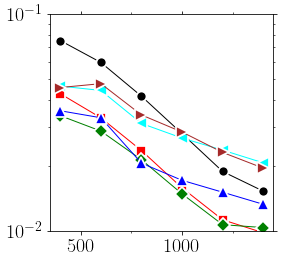

In [334]:
if eval(confParser['flags']['SroParameter']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    #--- plot order parameter vs. distance
    symbols=Symbols()
    lg = Legends()
    lg.Set(fontsize=16,
           bbox_to_anchor=(0.5,0.4,0.5,0.5),
          )
    ax = utl.PltErr(None,None,Plot=False)
                
    for indxx in range(6):

    #--- loop over temp
        temps = [400,600,800,1000,1200,1400]
        stdd = np.zeros(len(temps))
        for temp, count in zip(temps,range(10)): #--- T
            pathh = './NiCoCrNatom100KTemp%ssro/Run0/orderParameter/deltap_r_ij_index%s.txt'%(temp,indxx)
            print('parse from %s'%pathh)
            try:
                sarray = np.loadtxt(pathh)
                #--- filter
                filtr = ~np.isnan(sarray[:,1])
                #--- order parameter
                sdata = sarray[filtr]
                xdata = sdata[:,0]
                ydata = sdata[:,1]
                #--- std y
                stdd[count] = np.std( ydata )
#                 #--- plot
#                 utl.PltErr(xdata,ydata,
#                             Plot=False,
#                             attrs=symbols.GetAttrs(count=count,label=r'$%s$'%temp),      
#                             ax=ax,
#                             )


                #--- first dip
    #            x_axis, f, valleys = GetExtrema(xdata,ydata,2.3,verbose=False)
    #            ksi[count] = valleys[1]
    #            print('minimum at ',valleys[1])
            except:
                traceback.print_exc()
                continue

        #--- plot
#         utl.PltErr([0,cutoff],[0,0],
#                     attrs={'fmt':'-.r'},
#                     ax=ax,
#                     Plot=False,
#                     title='orderParameter/wc_diff_sheng_index%s.png'%indxx,
#                    legend=lg.Get(),
#     #               xlim=[2.0,20.0],
#     #                  ylim=[0.1-0.33,.7-0.33],
#                 DrawFrame=[0.2,0.2,0.15,0.1,0.1],
#                 )


    #--- plot rms
        utl.PltErr(temps,stdd,
                Plot=False,
                attrs=symbols.GetAttrs(count=indxx),      
#                 DrawFrame=[0.2,0.2,0.15,0.1,0.1],
                yscale='log',
                ylim=(0.01,0.1),
                ax=ax
#                      title='orderParameter/rms_sro_temperature_pair%s.png'%indxx,
                )

# Dislocations
## load line coordinates

In [297]:
def shift(atomm,lx):
    xc=atomm.x[0]
    atomm.x -= xc
    negative_shift = atomm.x >= 0.5*lx
    positive_shift = atomm.x < -0.5*lx
    assert not np.all([np.any(negative_shift),np.any(positive_shift)])
    atomm.x -= negative_shift * lx
    atomm.x += positive_shift * lx
    atomm.x += xc
    return np.any(negative_shift), np.any(positive_shift)
        
def GetVertexCoords(pathh,box,times,verbose=False):
    atomss = {}
    lx = box.CellVector[ 0, 0 ]
    filtrd_list = os.listdir(pathh) #fnmatch.filter(os.listdir(pathh), 'mydislocations.???')
    if verbose:
        print('files:',filtrd_list)
    for myfile in filtrd_list: #--- multiple files
        #--- time step
        indd=myfile.find('.')
        timei=int(myfile[indd+1:])
        if verbose:
            print('file=',myfile)
            print('timei=',times[timei])
 
        #--- read file
        strr=open('%s/%s'%(pathh,myfile)).readlines() #--- read as string
        li = strr.index('DISLOCATIONS 2\n') #--- 1st line to be read
        if verbose:
            print('read line %s '%li)
        li += 1
        
        atomss[times[timei]] = {}
        tmp = {}
        for ii in range(2): #--- two dislocations
            dislocation_id = int(strr[li])
            if verbose:
                print('dislocation_id=',dislocation_id)
            #
            li += 3
            n_vertices = int(strr[li]) #--- # of lines
            if verbose:
                print('n_vertices=',n_vertices)
            #
            li+=1
            vertice_xyz=np.c_[list(map(lambda x: x.rsplit(sep=' ')[:3],strr[li:li+n_vertices]))].astype(float)
            li+=n_vertices
            #--- wrap
            tmp[ii]=lp.Atoms(x=vertice_xyz[:,0],
                                             y=vertice_xyz[:,1],
                                             z=vertice_xyz[:,2]
            )
            wrap = lp.Wrap(tmp[ii],box)
            wrap.WrapCoord()
            wrap.Set( tmp[ii] )
            wrap = lp.Wrap(tmp[ii],box)
            assert np.all(wrap.isInside()), 'aotms outside original box!'    
        #--- shift      
#        xmean0=np.mean(tmp[0].x)
        negative_shift, positive_shift = shift(tmp[0],lx)
#        if negative_shift or positive_shift:
#           print('shift',np.mean(tmp[0].x),xmean0,times[timei])

#        xmean1=np.mean(tmp[1].x)
        negative_shift, positive_shift = shift(tmp[1],lx)
#        if negative_shift or positive_shift:
#           print('shift',np.mean(tmp[1].x),xmean1,times[timei])

        #--- shift disl.0 or disl.1
        if np.mean(tmp[1].x)-np.mean(tmp[0].x) < -0.5*lx:
            tmp[1].x += lx
        elif np.mean(tmp[1].x)-np.mean(tmp[0].x) > 0.5*lx:
            tmp[1].x -= lx

        #--- front:0 rear: 1
        front = 1
        behind = 0
        if np.mean(tmp[0].x) - np.mean(tmp[1].x) > 0.0:
            front = 0
            behind = 1
        tmp_front = tmp[front]
        tmp_behind = tmp[behind]

        tmp[0] = tmp_front
        tmp[1] = tmp_behind
                    
        atomss[times[timei]][0] = tmp[0]
        atomss[times[timei]][1] = tmp[1]
#        counter += 1
            
    return atomss

if eval(confParser['flags']['DislocAnl']):
    path = confParser['input files']['path']
    indx = confParser['input files']['fileIndex']
    fileName = '%s/%s'%(path,confParser['input files']['filename'].split()[int(indx)])
    nevery = int(confParser['parameters']['nevery'])
    #--- make directory
    if eval(confParser['dislocation analysis']['WritDisc']) and not eval(confParser['dislocation analysis']['ReadDisc']):
        try:
            os.system('rm -r dislocations')
        except:
            pass
        !mkdir -p dislocations/mydislocations
        #--- run ovitos
        #
        !ovitos OvitosCna.py $fileName mydislocations $nevery 5
        !mv mydislocations.* dislocations/mydislocations

    #--- box
    box = lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) )

    #--- load ca files: extract xyz
    times = list(lmpData.coord_atoms_broken.keys())
    times.sort()
    atomss = GetVertexCoords('./dislocations/mydislocations', box, times, verbose=False) #--- dislocation segments
    print(atomss.keys())
    
    #--- print
    timei=0
    idd=1 #--- dislocation id
    display(pd.DataFrame(atomss[timei][idd].__dict__))


InputFile= /Users/Home/Desktop/Tmp/txt/git/HeaDef/lammpsRuns/AmirData/shengAnnealed/Temp600/dislocated/Run0/dump.shearedge5k_Sheng5_anealed_500load
num_frames= 2
frame=0
frame=1
dict_keys([160000, 0])


,x,y,z
0,265.621002,91.732979,25.306110
1,266.449005,91.730682,25.285191
2,266.748322,91.069107,25.604681
3,267.144318,91.045609,26.362514
4,267.963318,91.073769,26.352015
...,...,...,...
227,263.938995,91.779236,25.327160
228,264.371765,91.424049,25.304043
229,264.677490,91.414650,25.871838
230,265.302490,91.396957,25.872845


## 3d map

In [537]:
# from mpl_toolkits import mplot3d

# for ii in atomss.keys():
#     fig = plt.figure()
#     ax = plt.axes(projection='3d')
#     xyz_data=np.c_[atomss[ii].x, atomss[ii].y, atomss[ii].z ]
    
#     zlo=xyz_data[:,2].min()
#     zhi=xyz_data[:,2].max()
#     dz=zhi-zlo
#     ymean=xyz_data[:,1].mean()
#     xmean=xyz_data[:,0].mean()

#     ax.set_zlim(zlo,zhi)
#     ax.set_ylim(ymean-0.5*dz,ymean+0.5*dz)
#     ax.set_xlim(xmean-0.5*dz,xmean+0.5*dz)


#     ax.plot3D(xyz_data[:,0],xyz_data[:,1],xyz_data[:,2] , 'black')
#     plt.show()

## sro within stacking fault

InputFile= dislocations/dump.xyz
num_frames= 1
frame=0
output neighbor list=51.75786018371582 s
reached end of file!
load neighbor list=81.41819596290588 s
peaks of g(r) at:r= [ 2.51053216  3.55740867  4.37137625  5.03541217  5.65887829  6.16033872
  6.68007678  7.91021105  8.41469959  9.07813999  9.85907787 10.39817172
 11.0105388  11.45830438 11.70423495 12.1414142  12.719655   13.21652595
 14.17272462 14.59113559 15.34248348 16.63369637 17.5025758  18.42206509
 18.56516966 18.74178493 19.28057459 19.80842186]
valleys of g(r) at:r= [ 0.          3.04920013  3.90490469  4.87136881  5.32840257  6.03438942
  6.26335959  7.13458207  8.26457327  8.47691543  9.44760044 10.21947641
 10.65440217 11.42560267 11.48312039 11.8261009  12.4243552  12.86134376
 13.73781493 14.38712156 14.90208452 15.79470935 17.26170738 17.95361358
 18.43404433 18.65267729 19.07948967 19.59719897]


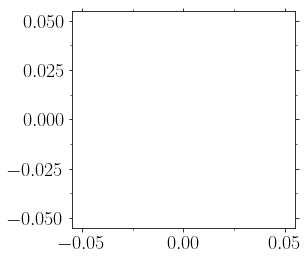

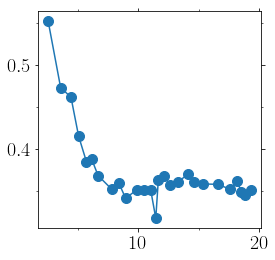

InputFile= dislocations/dump.xyz
num_frames= 1
frame=0
output neighbor list=51.236311197280884 s
reached end of file!
load neighbor list=89.0181188583374 s
peaks of g(r) at:r= [ 2.51964517  3.57124858  4.38241138  5.04688969  5.65024243  6.22251304
  6.68427927  7.58033389  7.94488729  8.50816684  9.08758531  9.78882486
 10.49736165 11.03473667 12.03180227 12.6961091  13.16055356 14.19380019
 14.61596813 15.3876576  16.64674678 17.56546358 17.70524493 18.80103269
 19.33415    19.76160241]
valleys of g(r) at:r= [ 0.          3.02969976  3.94236774  4.74999083  5.32402974  6.01760784
  6.26196776  7.13530704  7.87044193  8.33715539  8.6457971   9.4771657
 10.11164709 10.66087129 11.80665838 12.3250227  12.897338   13.75044084
 14.34047023 14.96243065 15.91284137 17.29458953 17.67946421 18.12796489
 19.07411319 19.59205796]


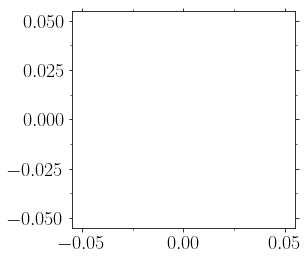

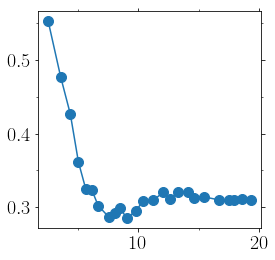

In [120]:
class SroStackFault(PltDislAtoms):
    '''
    compute sro parameters within a stacking ault
    '''
    def __init__(self, df, box ):
        PltDislAtoms.__init__(self,df,box,Plot=False)

        
    def SetLimits(self,df_dislc,**kwargs):
        '''
        set xyz limits
        '''
        dislc = self.Copy(df_dislc)
        self.Wrap(dislc)
        self.IntrpDisLines(dislc)
        
            
        #--- set axis limits
        self.ymean += [np.mean(dislc['y'])] if not 'ystack' in kwargs else [kwargs['ystack']]
        self.xlo += [np.min(self.xint)]
        self.xhi += [np.max(self.xint)]
        self.zlo += [np.min(self.zint)]
        self.zhi += [np.max(self.zint)]
        
    def SetFiltr(self, rc = 2.5):
        #--- limits
        xxlo = np.min(self.xlo)
        xxhi = np.max(self.xhi)
        zzlo = np.min(self.zlo)
        zzhi = np.max(self.zhi)
        yylo = np.min(self.ymean)-rc
        yyhi = np.max(self.ymean)+rc

        #--- xyz
        x=self.atoms['x']
        y=self.atoms['y']
        z=self.atoms['z']
    
        self.filtr = np.all([y>=yylo, y<yyhi, x>=xxlo, x<xxhi, z>=zzlo, z<zzhi ],axis=0)



        
    
    def GetNeighborList(self,confParser):
        
        #--- set parameters
        natoms = eval(confParser['neigh list']['natom']) #--- subset of atoms
        self.cutoff = eval(confParser['neigh list']['cutoff'])
        nevery = 1 #int(confParser['parameters']['nevery'])
        
        #--- write dump file
        fileName = 'dislocations/dump.xyz'
        wd = lpp.WriteDumpFile(lp.Atoms(**self.atoms.to_dict()), self.box)
        wd.Write(fileName, itime=0,
                 attrs=['id', 'type', 'x', 'y', 'z' ], 
                 fmt = '%i %i %5.4e %5.4e %5.4e' )
        
        
        #--- filter
        NATOM = len(self.atoms['x'])
        atom_indices = np.arange(NATOM)[self.filtr]
        if natoms < len(atom_indices):
            atom_indices = atom_indices[0:natoms]
#            print(atom_indices)
        atom_indices = ' '.join(list(map(str,atom_indices)))
    
    
        #--- call ovito
        t0=time.time()
        output = 'dislocations/neighList.xyz'
        try:
            !rm $output
        except:
            pass
        #--- build full neigh list but with a list of query points
        !ovitos OvitosCna.py $fileName $output  $nevery 6 $self.cutoff $atom_indices
        print('output neighbor list=%s s'%(time.time()-t0))
        
        #--- parse
        t0=time.time()
        lmpNeigh = lp.ReadDumpFile( 'dislocations/neighList.xyz' )
        lmpNeigh.GetCords( ncount = sys.maxsize)
        print('load neighbor list=%s s'%(time.time()-t0))
        self.neigh = lmpNeigh.coord_atoms_broken[0]
    
    
    def grValleys(self,rmin=2.3):

        rdf = lp.ComputeRdf(  lp.Atoms(**self.atoms.to_dict()), self.box )
        rdf.PairCrltn(  
                      bins=np.arange(0.0,self.cutoff,0.1), 
                      rlist=self.neigh.DIST,
                      regular_r = True,
                      )
        bin_edges1, hist1, err1  = rdf.Get()
        x_axis, f, self.valleys = GetExtrema(bin_edges1,hist1,rmin)
    
    
    def SetSro(self,pairi,pairj):
        self.grValleys() #--- valleys
        
        rdf = lp.ComputeRdf(  lp.Atoms(**self.atoms.to_dict()), self.box )
        self.sro = rdf.Sro(self.neigh,pairi,pairj,bins=self.valleys)

        
if eval(confParser['flags']['DislocAnl']):
    #--- timestep
    times = list(atomss.keys())
    times.sort()
    timei = times[-1]

    #--- stacking fault
    sroStack = SroStackFault( df=lmpData.coord_atoms_broken[ timei ], 
                        box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) ), 

                      )

    sroStack.SetLimits(atomss[ timei ][ 0 ])#,ystack=10 )
    sroStack.SetLimits(atomss[ timei ][ 1 ])#,ystack=10)
    sroStack.SetFiltr()
    sroStack.GetNeighborList(confParser)
    sroStack.SetSro(1,1) #--- rss

    bin_edges, p0, dp0 =  sroStack.sro
    PltErr(bin_edges,p0)    

    np.savetxt('dislocations/pr_aging_ij_index%s.txt'%0,
           np.c_[bin_edges,p0,dp0],
           header='r\tp\terr_p')

    
    #--- outside
    sroStack = SroStackFault( df=lmpData.coord_atoms_broken[ timei ], 
                        box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) ), 

                      )

    sroStack.SetLimits(atomss[ timei ][ 0 ], ystack=10 )
    sroStack.SetLimits(atomss[ timei ][ 1 ], ystack=10 )
    sroStack.SetFiltr()
    sroStack.GetNeighborList(confParser)
    sroStack.SetSro(1,1) #--- rss

    bin_edges, p0, dp0 =  sroStack.sro
    PltErr(bin_edges,p0)    

    np.savetxt('dislocations/pr_aging_ij_index%s_ystack10.txt'%0,
           np.c_[bin_edges,p0,dp0],
           header='r\tp\terr_p')

    

                



In [99]:
# box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) )
# box.BoxBounds[1][:2].astype(float)
# sroStack.ymean

[90.39023264453442, 90.41696643166667]

### Plot

parse from orderParameter/pr_annealed_ij_index0.txt
parse from dislocations/pr_aging_ij_index0.txt
parse from dislocations/pr_aging_ij_index0_ystack10.txt


<AxesSubplot:>

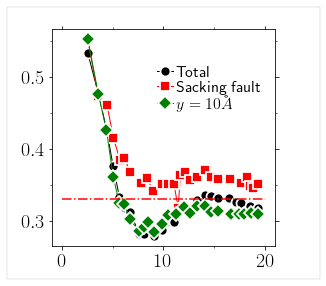

In [121]:
if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):
    indxx = 0 #--- NiNi
    #--- plot order parameter vs. distance
    symbols=Symbols()
    lg = Legends()
    lg.Set(fontsize=16,
           bbox_to_anchor=(0.5,0.4,0.5,0.5),
          )
    ax = utl.PltErr(None,None,Plot=False)
    
    #--- loop over temp
    temp = 600
    for count, label in zip(range(3),['Total','Sacking fault',r'$y=10 \r{A}$']): #--- T
        pathh = [
#            './NiCoCrNatom100KTemp%ssro/Run0/orderParameter/pr_annealed_ij_index%s.txt'%(temp,indxx),
#            './NiCoCrNatom100KTemp600AgingSro/Run0/dislocations/pr_aging_ij_index%s.txt'%(indxx),
            'orderParameter/pr_annealed_ij_index%s.txt'%(indxx), #--- total
            'dislocations/pr_aging_ij_index%s.txt'%(indxx), #--- y=y(dislocation)
            'dislocations/pr_aging_ij_index%s_ystack10.txt'%(indxx), #--- y=10
            
                ][count]
        print('parse from %s'%pathh)
        try:
            sarray = np.loadtxt(pathh)
            #--- filter
            filtr = ~np.isnan(sarray[:,1])
            #--- order parameter
            sdata = sarray[filtr]
            xdata = sdata[:,0]
            ydata = sdata[:,1]
            #--- plot
            utl.PltErr(xdata,ydata,
                        Plot=False,
                        attrs=symbols.GetAttrs(count=count,label=label),      
                        ax=ax,
                        )
        
    
            #--- first dip
#            x_axis, f, valleys = GetExtrema(xdata,ydata,2.3,verbose=False)
#            ksi[count] = valleys[1]
#            print('minimum at ',valleys[1])
        except:
            traceback.print_exc()
            continue
            
    #--- plot
    utl.PltErr([0,20],[0.33,0.33],
                attrs={'fmt':'-.r'},
                ax=ax,
                Plot=False,
                title='orderParameter/wc_aging_dislocated_index%s.png'%indxx,
               legend=lg.Get(),
#               xlim=[2.0,20.0],
#                  ylim=[0.1-0.33,.7-0.33],
            DrawFrame=[0.2,0.2,0.15,0.1,0.1],
            )

## height correlations

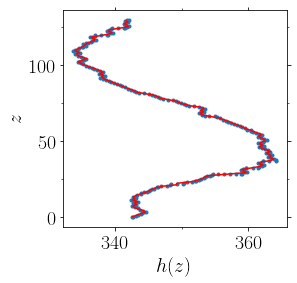

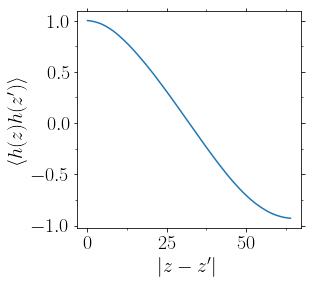

In [134]:
def interp(df,box,timei,verbose=False,Plot=True,**kwargs):
    x=df.z
    y=df.x
    #
    [xlo, xhi, junk]=box.BoxBounds[2].astype(float)
#    print(xlo,xhi)
    dx=1.0 #2*np.ceil(np.abs(np.diff(x)).min())
    hist, bin_edges = np.histogram(x,bins=np.arange(xlo,xhi,dx))
    ysum, bin_edges = np.histogram(x,bins=np.arange(xlo,xhi,dx),weights=y)
    ysum2, bin_edges = np.histogram(x,bins=np.arange(xlo,xhi,dx),weights=y*y)
    ymean = ysum / hist
    ysum2 /= hist
    ysum2 -= ymean*ymean
    ystd = (ysum2 / hist)**0.5
    bin_edges = (bin_edges[1:]+bin_edges[:-1])*0.5
    
    if Plot:
        if verbose:
            print('itime=',timei)
        if 'ax' in kwargs:
            ax = kwargs['ax']
            args = {'ax':ax}
            kwargs.pop('ax')
        else:
            args={}
        xx=0.5*(x.max()-x.min())
        
        ax=PltErr(y,x,
              attrs={'fmt':'.'},
                Plot=False,
                **args
              )
        ax=PltErr(ymean,bin_edges, #yerr=ystd,
              attrs={'fmt':'-r'},
               ax=ax,
#                ylim=(np.mean(y)-xx,np.mean(y)+xx),
#                xlim=(np.min(x),np.max(x)),
                Plot=False,
               **kwargs
              )
    
    return bin_edges, ymean, ystd


def Crltn(x,y):
    xq=np.fft.fft(x)
    yq=np.fft.fft(y)
    return np.fft.ifft(np.abs(xq*yq))/len(xq)

def PltCrltnn(xint,yint, Plot = True, attrs={'fmt':'-'},**kwargs):
#    print(yint.shape)
    crltn = Crltn(zscore(yint),zscore(yint))
    n = xint.shape[0]
#    print(kwargs)
    if Plot:
        PltErr((xint-xint[0])[0:int(n/2+n%2)],crltn[0:int(n/2+n%2)],
               attrs=attrs,
               Plot = False,
               **kwargs)
    return (xint-xint[0])[0:int(n/2+n%2)],crltn[0:int(n/2+n%2)] #, xint[crltn<0][0]
        
if eval(confParser['flags']['DislocAnl']):

    zscore = lambda x: (x-np.mean(x))/np.std(x) 


    #--- interpolate h(z)
    times = list(atomss.keys())
    times.sort()
    timei=times[-1]
    xint, yint, junk = interp(atomss[timei][idd],box,timei,
                             ystr=r'$z$'    if not eval(confParser['flags']['RemoteMachine']) else 'z',
                             xstr=r'$h(z)$' if not eval(confParser['flags']['RemoteMachine']) else 'h(z)' ,
                             )

    #--- correlation
    junk,  junk =PltCrltnn(xint,yint,
                                xstr=r'$|z-z^\prime|$' if not eval(confParser['flags']['RemoteMachine']) else 'dz',
                               ystr=r'$\langle h(z)h(z^\prime)\rangle$' if not eval(confParser['flags']['RemoteMachine']) else 'c(dz)',

                 )


### plot

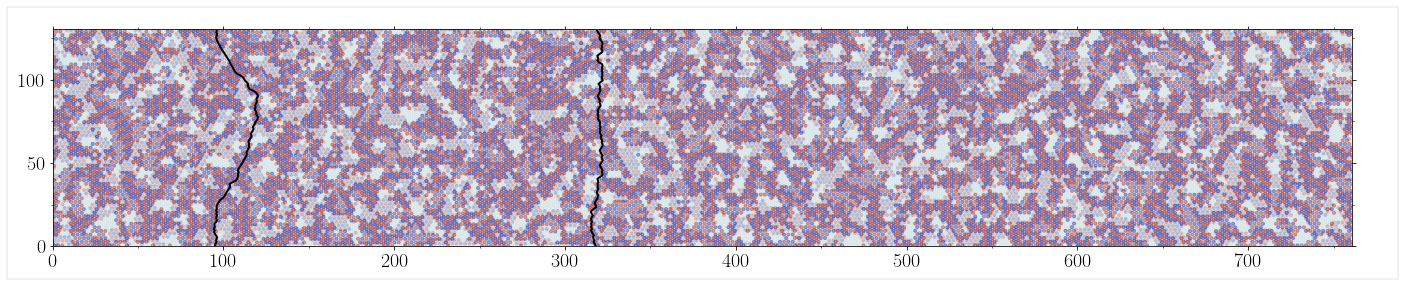

In [298]:
class PltDislAtoms:
    '''
    Plot dislocation line on top of atoms
    '''
    def __init__(self, df, box, Plot=False, **kwargs ):
        self.atoms = df
        self.box = box
        self.plot = Plot
        self.ax = utl.PltErr(None,None,Plot=False,**kwargs)
        #--- axis limits
        self.ymean = []
        self.xlo=[]
        self.xhi=[]
        self.zlo=[]
        self.zhi=[]
                       
    def IntrpDisLines(self,dislc):
        '''
        interpolate line segments onto a grid
        '''
        self.zint, self.xint, junk = interp(dislc,self.box,0,Plot=False)

    def Copy(self,atoms):
        return lp.Atoms(x=np.copy(atoms.x),
                       y=np.copy(atoms.y),
                       z=np.copy(atoms.z))
        
    def Wrap(self,dislc):
        '''
        wrap line segments
        '''
        wrap = lp.Wrap(dislc,self.box)
        wrap.WrapCoord()
        wrap.Set( dislc )
        wrap = lp.Wrap(dislc,self.box)
        assert np.all(wrap.isInside()), 'aotms outside original box!'
        
    def PlotLines(self,df_dislc,**kwargs):
        '''
        plot segments (and arrows)
        '''
        dislc = self.Copy(df_dislc)
        self.Wrap(dislc)
        self.IntrpDisLines(dislc)
        
        if not self.plot:
            plt.ioff()
            
        #--- set axis limits
        self.ymean += [np.mean(dislc['y'])]
        self.xlo += [np.min(self.xint)]
        self.xhi += [np.max(self.xint)]
        self.zlo += [np.min(self.zint)]
        self.zhi += [np.max(self.zint)]
        
        #--- lines
        self.ax=utl.PltErr(self.xint, 
                       self.zint,
                       attrs={'fmt':'-','lw':2,'color':'black'},
                       Plot=False,
                       ax = self.ax
                      )

        #--- plot arrows (velocity)
        if 'dx' in kwargs and 'dy' in kwargs: 
            dx = kwargs['dx']
            assert len(self.xint) == len(dx), 'len(self.xint)=%s,len(dx)=%s'%(len(self.xint),len(dx))
            dx -= np.mean(dx)
            dx /= np.std(dx)
            list(map(lambda x: self.ax.arrow(self.xint[x], self.zint[x],
                                        dx=8*dx[x],dy=kwargs['dy'][x],
                                        head_width=5,
                                        head_length=6,
                                        lw=0.6,
                                        color='black',#'C0',
                                       ),range(0,len(self.xint),6)))


    def PlotAtoms(self,s=8,alpha=0.5,**kwargs):
        #--- xyz
        x=self.atoms['x']
        y=self.atoms['y']
        z=self.atoms['z']
        ttype=np.array(self.atoms['type'],dtype=str)
        ttype[ttype=='1']='#D2E3E6'
        ttype[ttype=='2']='#404EB1'
        ttype[ttype=='3']='#B44A43'
        
        
        #--- 2d stack
        ymean = np.mean(self.ymean) if not 'ystack' in kwargs else kwargs['ystack']
        rc = 1.0 if not 'rc' in kwargs else kwargs['rc']
        filtr = np.all([ymean-rc<=y, y<ymean+rc],axis=0)

        #--- axis limits
        self.xlim=kwargs['xlim'] if 'xlim' in kwargs else\
                  (np.min(self.xlo),np.max(self.xhi) )
        self.ylim=kwargs['ylim'] if 'ylim' in kwargs else\
                  (np.min(self.zlo),np.max(self.zhi) )


        #--- plot atoms
        self.ax.scatter( x[filtr],z[filtr], 
                   c=ttype[filtr],
                   s=s,
                   alpha=alpha,
                )

    def Save(self,title,**kwargs):
        #
        utl.PltErr( None,None, attrs={'fmt':'.','markersize':2},
                xlim=self.xlim,
                ylim=self.ylim,
               ax=self.ax,
               title=title,
               Plot = False,
                   **kwargs
                )
        #
        if not self.plot:
            plt.close(self.ax.get_figure())
            
            
            

if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):

    #--- timestep
    times = list(atomss.keys())
    times.sort()
    timei = times[-1]
    
    #--- box
    box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) )
    aspect_ratio = box.CellVector[0,0]/box.CellVector[2,2]
    
    
    #--- plot
    pltDisl = PltDislAtoms( df=lmpData.coord_atoms_broken[ timei ], 
                           box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) ), 
                           Plot = True, 
                           figsize=(4*aspect_ratio,4) 
                          )
    #--- plot lines
    pltDisl.PlotLines(atomss[ timei ][ 0 ],
#                     dx = vel[0], #--- velocities
#                     dy = np.zeros(len(vel[0])),

                    )
    pltDisl.PlotLines(atomss[ timei ][ 1 ])
    #--- plot atoms
    pltDisl.PlotAtoms(s=10,
                      alpha=0.5,#.8,#.4,
#                     xlim=(np.mean(df_disc0.x)-0.5*(np.max(df_disc0.z)-np.min(df_disc0.z)),
#                           np.mean(df_disc0.x)+0.5*(np.max(df_disc0.z)-np.min(df_disc0.z))),
    #                 xlim = (0,760),
                       xlim=box.BoxBounds[0][:2].astype(float),
                       ylim=box.BoxBounds[2][:2].astype(float),
#                       ystack = 10.0, #np.mean(box.BoxBounds[1][:2].astype(float)), #--- comment if there are dislocations
                        rc=2.5,
                     )
    #--- save
    pltDisl.Save(
                 title='dislocations/DislAgedT600K',
#                 title='dislocations/DislAgingT600K.png',
#                 title='dislocations/DislRandomT600K.png',
                 dpi=150,
                DrawFrame=[0.035,0.035,0.15,0.1,0.1],
                )


In [506]:
#print('every ang is', 3.0/box.CellVector[2,2])

every ang is 0.02270484123882844


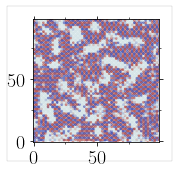

In [518]:
scalee=0.02270484123882844
lx=100 #A
figsize=lx*scalee

if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):

    #--- timestep
    times = list(atomss.keys())
    times.sort()
    timei = times[-1]
    
    #--- box
    box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) )
    aspect_ratio = box.CellVector[0,0]/box.CellVector[2,2]
    
    
    #--- plot
    pltDisl = PltDislAtoms( df=lmpData.coord_atoms_broken[ timei ], 
                           box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) ), 
                           Plot = True, 
                           figsize=(figsize,figsize) 
                          )

    #--- plot atoms
    pltDisl.PlotAtoms(s=4,
                      alpha=0.5,#.8,#.4,
#                     xlim=(np.mean(df_disc0.x)-0.5*(np.max(df_disc0.z)-np.min(df_disc0.z)),
#                           np.mean(df_disc0.x)+0.5*(np.max(df_disc0.z)-np.min(df_disc0.z))),
    #                 xlim = (0,760),
                      xlim=(float(box.BoxBounds[0][0]),float(box.BoxBounds[0][0])+lx),
                      ylim=(float(box.BoxBounds[2][0]),float(box.BoxBounds[2][0])+lx),
                      ystack = np.mean(box.BoxBounds[1][:2].astype(float)), #--- comment if there are dislocations
                        rc=2.5,
                     )
    #--- save
    pltDisl.Save(
                 title='dislocations/sroDislFree.png',
#                 title='dislocations/DislAgingT600K.png',
#                 title='dislocations/DislRandomT600K.png',
                 dpi=150,
                DrawFrame=[0.2,0.1,0.15,0.1,0.1],
                )


In [136]:
def PltDislAtomsWrapperFunc(**kwargs):
    #--- plot
    pltDisl = PltDislAtoms( df=kwargs['df'],#lmpData.coord_atoms_broken[ timei ], 
                           box=kwargs['box'],#lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) ), 
                           Plot = kwargs['Plot'],#True, 
    #                       figsize=(18,3) 
                          )
    #--- plot lines
    args = {}
    if 'dx' in kwargs and 'dy' in kwargs:
        args={'dx':kwargs['dx'],'dy':kwargs['dy']}
    pltDisl.PlotLines(kwargs['df_disc'],#atomss[ timei ][ 0 ],
                      **args,
#                      dx = vel[0], #--- velocities
#                      dy = np.zeros(len(vel[0])),

                     )
    #pltDisl.PlotLines(df_disc1)
    #--- plot atoms
    pltDisl.PlotAtoms(s=10,
                      alpha=.8,#.4,
                     xlim=(np.mean(kwargs['df_disc'].x)-0.5*(np.max(kwargs['df_disc'].z)-np.min(kwargs['df_disc'].z)),
                           np.mean(kwargs['df_disc'].x)+0.5*(np.max(kwargs['df_disc'].z)-np.min(kwargs['df_disc'].z))),
    #                 xlim = (0,760),
                     )
    #--- save
    pltDisl.Save(
                 title=kwargs['title'],#'dislocations/DislVelocItime%s_id%s.png'%(timei,idd),
                 dpi=kwargs['dpi'],#150,
                DrawFrame=kwargs['DrawFrame'],#[0.2,0.1,0.15,0.1,0.01],
                )
    
# PltDislAtomsWrapperFunc(
#     df=lmpData.coord_atoms_broken[ timei ], 
#     box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) ), 
#     Plot = True,
#     df_disc=atomss[ timei ][ 0 ],
#     title='dislocations/DislVelocItime%s_id%s.png'%(timei,idd),
#     dpi=150,
#     DrawFrame=[0.2,0.1,0.15,0.1,0.01],
# )


### multiple timesteps

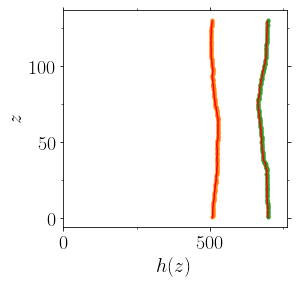

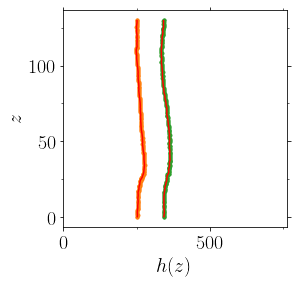

In [157]:
if eval(confParser['flags']['DislocAnl']):
    #--- timestep
    times = list(atomss.keys())
    times.sort()
    timei = times[0]
    
    #--- discretized x
    xint, junk, junk = interp(atomss[timei][idd],box,timei,Plot=False)

    for idd in [0,1]:
        #--- interpolate
        ax = PltErr(None,None,Plot=False)
        yint = np.c_[list(map(lambda x:interp(atomss[x][idd],box,x,Plot=True,ax=ax,                             
                                              ystr=r'$z$' if not eval(confParser['flags']['RemoteMachine']) else 'z',
                                              xstr=r'$h(z)$' if not eval(confParser['flags']['RemoteMachine']) else 'h(z)',
                                              xlim=(0,761)
                                             )[1],times))]
        plt.show()
        #--- print
        header = 'r\t'+reduce(lambda x,y:x+y,map(lambda x: 'h_%s\t'%x ,range(yint.shape[0])))
        np.savetxt('dislocations/h%s_profile_multiple_times.txt'%idd,np.c_[xint,yint.T],header=header)

        #--- plot lines & atoms                
        list(map(lambda x:        
            PltDislAtomsWrapperFunc(
            df=lmpData.coord_atoms_broken[ x ], 
            box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) ), 
            Plot = False,
            df_disc=atomss[ x ][ idd ],
            title='dislocations/DislItime%s_id%s.png'%(x,idd),
            dpi=150,
            DrawFrame=[0.2,0.1,0.15,0.1,0.01],
            ),times))

In [161]:
np.std(yint)

44.90355247171656

### multiple timesteps: plot h

In [199]:
indxx=1 #--- csa, rsa
dislocation_id = 0


load=400
load=500
load=550
load=600
load=650
hx.shape= (129, 5)


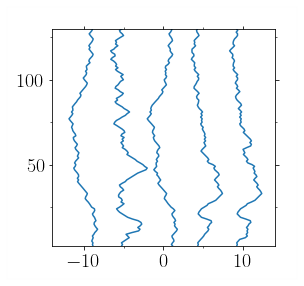

In [200]:
class parse:
    def __init__(self,fp0,fp1):
        self.fp0 = fp0
        self.fp1 = fp1
        pass
    def ParseData(self,load, pathh,dislocation_id,**kwargs):
        print('load=%s'%load)
        sdata0 = np.loadtxt('%s/%s'%(pathh,self.fp0)) #--- velocity profile
        sdata1 = np.loadtxt('%s/%s'%(pathh,self.fp1)) #--- velocity profile

        #--- fetch data
        self.r = sdata0[:,0]
        hx0 = sdata0[:,1:]
        hx1 = sdata1[:,1:]
        hx=[hx0,hx1][dislocation_id]
        if 'index' in kwargs: 
            val=hx.T[kwargs['index']]
        else:
            val = hx.T
        return val
    def Get_r(self):
        return self.r

if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):

    #--- parse data
    loads = [
                [500,600,650,700,750], #--- csa
                [400,500,550,600,650], #--- rsa
              ][indxx]
    
    ps = parse('h0_profile_multiple_times.txt',
               'h1_profile_multiple_times.txt'
              )
    hx = np.array(list(map(lambda x:ps.ParseData(
              load=x,
              pathh=[
                     'NiCoCrNatom100KTemp600/dislocated/load%s/Run0/dislocations'%x,
                     'NiCoCrNatom100KTemp600Rss/dislocated/load%s/Run0/dislocations'%x,
                    ][indxx],
              dislocation_id = dislocation_id,
              index = -1,
                ), loads))).T
    r = ps.Get_r()
    print('hx.shape=',hx.shape)

    
    
    
    #--- plot
    ax0=PltErr(None,None,Plot=False)
    shift = lambda x:(1+x)*50 #--- shift vertically
    attrs = {'markevery':1,'markersize':8}
#     list(map(lambda x:PltErr(x[0]-np.mean(x[0])+shift(x[1]),r,ax=ax0,
#                              attrs={'fmt':'-','label':load,'color':'C0'},
#                              Plot=False,
#                             ylim=(np.min(r),np.max(r)),
#                             xlim=(0,0.4*761),
#                             ),zip(hx.T,range(10))))
    list(map(lambda x:PltErr((x[0]-np.mean(x[0]))/np.std(x[0])+5*(x[1]-2),r,ax=ax0,
                             attrs={'fmt':'-','label':load,'color':'C0'},
                             Plot=False,
                            ylim=(np.min(r),np.max(r)),
                            xlim=(-14,14),
                            ),zip(hx.T,range(10))))
                                 
    utl.PltErr(None,None,ax=ax0,
                DrawFrame=[0.2,0.1,0.15,0.1,0.01],
                title='dislocations/h0_%s.png'%indxx,
      )


In [201]:
np.mean(np.std(hx,axis=0))

2.8846172340079015

In [1266]:
#     #--- parse data
#     load = 1200
#     ps = parse('vx0_profile_multiple_times.txt',
#                'vx1_profile_multiple_times.txt'
#               )
#     for dislocation_id in [0,1]:
#         vx = ps.ParseData(
#                   load=load,
#                   pathh=[
#                          'NiCoCrNatom100KTemp600/dislocated/load%s/Run0/dislocations'%load,
#                          'NiCoCrNatom100KTemp600Rss/dislocated/load%s/Run0/dislocations'%load,
#                         ][indxx],
#                   dislocation_id = dislocation_id,
#                     ).T
#         r = ps.Get_r()
#         print('vx.shape=',vx.shape)
#         ntime=vx.shape[1]
#         timei=0#int(ntime/2)
#         timef=ntime



#         #--- plot
#         ax0=PltErr(None,None,Plot=False)
#         shift = lambda x:(1+x)*50 #--- shift vertically
#         attrs = {'markevery':1,'markersize':8}
#         list(map(lambda x:PltErr(x,r,ax=ax0,
#                                  attrs={'fmt':'-','label':load,'color':'C0'},
#                                  Plot=False,
# #                                ylim=(np.min(r),np.max(r)),
# #                                xlim=(-14,14),
#                                 ),vx.T[timei:timei+1]))
                                 


### correlations

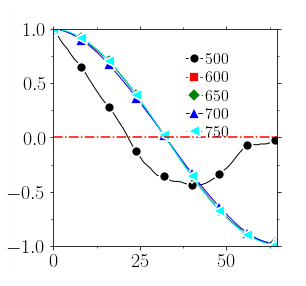

In [191]:
if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    #--- plot
    symbols = Symbols()
    legends = Legends()
    legends.Set(fontsize=16,
                labelspacing=.2,
                bbox_to_anchor=[(0.53,0.46,0.5,0.5),(0.3,0.42,0.5,0.5)][indxx]            
               )
    axc=PltErr([0,761],[0,0],attrs={'fmt':'-.r'},Plot=False)

            

    #--- plot correlations
    #--- correlation
    list(map(lambda x:PltCrltnn(r,x[0],
                    Plot=True,
                   ax=axc,
                   attrs=symbols.GetAttrs(count=x[1],label=r'$%s$'%loads[x[1]],nevery=8,fmt='-'),
                        ),
             zip(hx.T,range(10))))
                                             
    utl.PltErr(None,None,ax=axc,
               marker='o',
               DrawFrame=[0.2,0.1,0.15,0.1,0.01],
               ylim=(-1,1),
               xlim=(0,(np.max(r)-np.min(r))/2),
            title='dislocations/h0_crltn_%s.png'%indxx,
           legend=legends.Get(),
              )


## velocity correlations

h.shape= (2, 130)
v.shape= (1, 130)


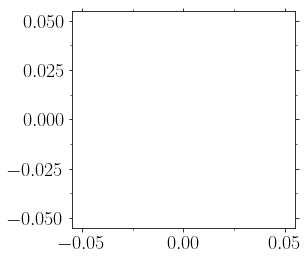

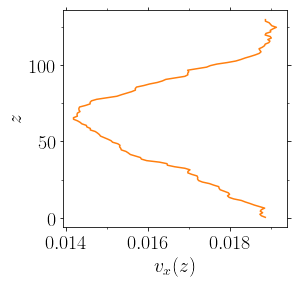

h.shape= (2, 130)
v.shape= (1, 130)


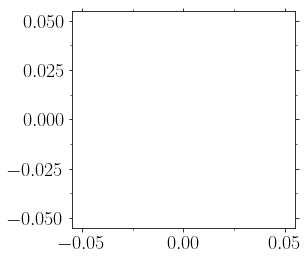

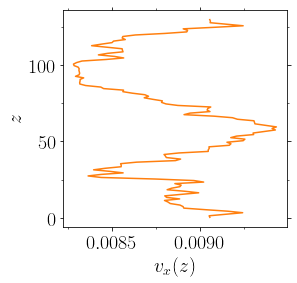

In [138]:
def minImage(v,box,verbose=False):
    lx = box.CellVector[ 0, 0 ]
    #--- minimum image
    v -= (np.mean(v) >= 0.5*lx) * lx
    v += (np.mean(v) < -0.5*lx) * lx
    return v

if eval(confParser['flags']['DislocAnl']):
    times = list(atomss.keys())
    times.sort()

    for idd in [0,1]:
        #--- interpolate
        ax = PltErr(None,None,Plot=False)
        #--- discretized x
        xint, junk, junk = interp(atomss[timei][idd],box,timei,Plot=False)
        yint = np.c_[list(map(lambda x:interp(atomss[x][idd],box,x,Plot=False,ax=ax,                             
                                             )[1],times))]


        #--- velocity fluctuations
        print('h.shape=',yint.shape)
    #    vel0=np.diff((yint0.T-np.mean(yint0,axis=1)),axis=1).T
        vel=np.diff((yint.T),axis=1).T
        vel=np.c_[list(map(lambda x:minImage(x,box),vel))] #--- pbc
        dt = times[1]-times[0]
        vel /= dt
        #--- print
        header = 'r\t'+reduce(lambda x,y:x+y,map(lambda x: 'vx_%s\t'%x ,range(vel.shape[0])))
        np.savetxt('dislocations/vx%s_profile_multiple_times.txt'%idd,np.c_[xint,vel.T],header=header)
        #
    #    vel0=(vel0.T-np.mean(vel0,axis=1)).T #--- zero mean
    #    vel0=(vel0.T/np.std(vel0,axis=1)).T  #--- unit variance
    #    vel=np.c_[vel.T,1+vel[0,:]].T
        print('v.shape=',vel.shape)

        #--- plot
        ntime=vel.shape[0]
        timei=0
        timef=ntime
        ax=PltErr(None,None,Plot=False)
        list(map(lambda x:PltErr(x,xint,ax=ax,
                                 attrs={'fmt':'-'},
                                 Plot=False,
                                 ystr=r'$z$' if not eval(confParser['flags']['RemoteMachine']) else 'z',
                                 xstr=r'$v_x(z)$' if not eval(confParser['flags']['RemoteMachine']) else 'vx(z)'),
                 vel[timei:timef]))
        plt.show()
    
        #--- plot lines & atoms
#         list(map(lambda x:PltDislAtoms(xint,yint[x[1]],
#                                   lmpData.coord_atoms_broken[ x[0] ],
#                                   atomss[ x[0] ][ idd ],
#                                   box,
#                                   'dislocations/DislVelocItime%s_id%s.png'%(x[0],idd),
#                                  dx = vel[x[1]],
#                                  dy = np.zeros(len(yint[x[1]])),
#                                     Plot=False,
#                                       ),
#                  zip(times,range(ntime))))


        list(map(lambda x:        
            PltDislAtomsWrapperFunc(
            df=lmpData.coord_atoms_broken[ x[0] ], 
            box=lp.Box( BoxBounds = lmpData.BoxBounds[0],AddMissing = np.array([0.0,0.0,0.0] ) ), 
            dx = vel[x[1]],
            dy = np.zeros(len(vel[x[1]])),
            Plot = False,
            df_disc=atomss[ x[0] ][ idd ],
            title='dislocations/DislVelocItime%s_id%s.png'%(x[0],idd),
            dpi=150,
            DrawFrame=[0.2,0.1,0.15,0.1,0.01],
            ),zip(times,range(ntime))))

### multiple timesteps

### Plot
#### mean velocity

In [153]:
indxx=1 #--- csa, rss
dislocation_id = 1


load=1200
load=1100
load=900
load=800
load=750
load=700
load=650
load=600
load=550
load=500
load=400
vx.shape= (11,)


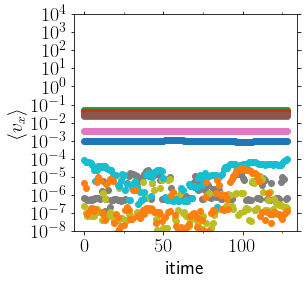

In [154]:
if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):

    loads= [
                        [1300,1200,1100,1000,950,750,700,650,600,500], #--- csa
                        [1200,1100,900,800,750,700,650,600,550,500,400], #--- rsa

][indxx]

    #--- parse
    ps = parse('vx0_profile_multiple_times.txt',
               'vx1_profile_multiple_times.txt'
              )
    vx = np.array(list(map(lambda x:ps.ParseData(
              load=x,
              pathh=[
                     'NiCoCrNatom100KTemp600/dislocated/load%s/Run0/dislocations'%x,
                     'NiCoCrNatom100KTemp600Rss/dislocated/load%s/Run0/dislocations'%x,
                    ][indxx],
              dislocation_id = dislocation_id,
                ), loads))).T
    r = ps.Get_r()
    print('vx.shape=',vx.shape)

    
    
    
    #--- plot
    ax=PltErr(None,None,Plot=False)
    list(map(lambda x:PltErr(np.arange(x.shape[1]),np.abs(np.mean(x,axis=0)),
                   ax=ax,
                    attrs={'fmt':'.','markersize':12},
                    xstr=r'itime',
                    ystr=r'$\langle v_x \rangle$',
                    yscale='log',
                    ylim=(1e-8,1e4),
                   Plot=False,
                    ), vx))
        
    #--- average
    vx_mean=list(map(lambda x:10**np.mean(np.log10(np.abs(x))),vx)) #--- mean velocity


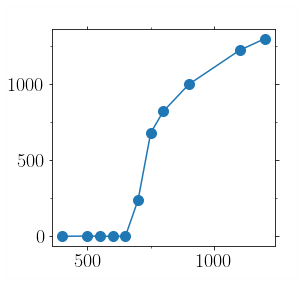

In [155]:
if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    prefact = 1e-10/(0.004*0.001*1e-9)
    np.savetxt('dislocations/mobility_%s.txt'%indxx,np.c_[loads,prefact*np.array(vx_mean)])
    PltErr(loads,prefact*np.array(vx_mean),
#           yscale='log',
       DrawFrame=[0.2,0.1,0.15,0.1,0.01],
        title='dislocations/mobility_%s.png'%indxx,
          )


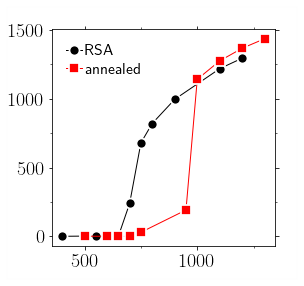

In [156]:
if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):
    data0 = np.loadtxt('dislocations/mobility_%s.txt'%0)
    data1 = np.loadtxt('dislocations/mobility_%s.txt'%1)
    symbols=Symbols()
    legends = Legends()
    legends.Set(fontsize=16,labelspacing=.2,
#                bbox_to_anchor=(0.5,0.44,0.5,0.5),
#                bbox_to_anchor=(0.65,0.3,0.5,0.5),
               )

    ax=utl.PltErr(data1[:,0],data1[:,1],Plot=False,
            attrs=symbols.GetAttrs(count=0,label='RSA',fmt='-'),
              )

    utl.PltErr(data0[:,0],data0[:,1],
            attrs=symbols.GetAttrs(count=1,label='annealed',fmt='-'),
              ax=ax,
    #           yscale='log',
           DrawFrame=[0.2,0.1,0.15,0.1,0.01],
            title='dislocations/mobility.png',
        legend=legends.Get(),          
              )


####  velocity profile

load=1200
vx.shape= (130, 32)


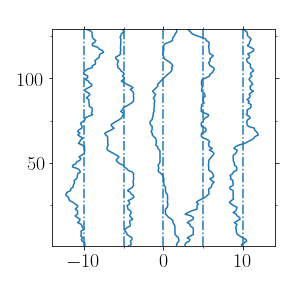

In [1427]:
if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):
    
    #--- parse data
    load = 1200
    ps = parse('vx0_profile_multiple_times.txt',
               'vx1_profile_multiple_times.txt'
              )
    vx = ps.ParseData(
              load=load,
              pathh=[
                     'NiCoCrNatom100KTemp600/dislocated/load%s/Run0/dislocations'%load,
                     'NiCoCrNatom100KTemp600Rss/dislocated/load%s/Run0/dislocations'%load,
                    ][indxx],
              dislocation_id = dislocation_id,
#              index = range(10,20),
                ).T
    r = ps.Get_r()
    print('vx.shape=',vx.shape)
    ntime=vx.shape[1]
    timei=int(ntime/2)
    timef=ntime
    
    
    
    #--- plot
    ax0=PltErr(None,None,Plot=False)
    shift = lambda x:(1+x)*50 #--- shift vertically
    attrs = {'markevery':1,'markersize':8}
    list(map(lambda x:PltErr((x[0]-np.mean(x[0]))/np.std(x[0])+5*(x[1]-2),r,ax=ax0,
                             attrs={'fmt':'-','label':load,'color':'C0'},
                             Plot=False,
                            ylim=(np.min(r),np.max(r)),
                            xlim=(-14,14),
                            ),zip(vx.T[timei:timef:3],range(5))))
    list(map(lambda x:PltErr([5*(x-2),5*(x-2)],[np.min(r),np.max(r)],ax=ax0,
                             attrs={'fmt':'-.','color':'C0'},
                             Plot=False,
                            ),range(5)))
                                 
    utl.PltErr(None,None,ax=ax0,
               marker='o',
                DrawFrame=[0.2,0.1,0.15,0.1,0.01],
                title='dislocations/v0_%s.png'%indxx,
      )

####  velocity correlations

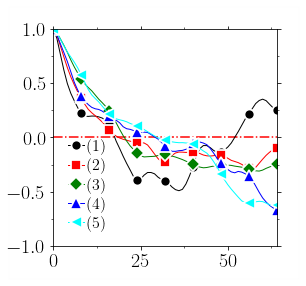

In [1424]:
if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):
    xint = r
    
    #--- plot
    legends = Legends()
    legends.Set(fontsize=16,labelspacing=.2)
    
    ax=utl.PltErr([0,(np.max(r)-np.min(r))/2],[0,0],attrs={'fmt':'-.r'},Plot=False)
    
    #--- correlation
    cvx = np.c_[list(map(lambda x:PltCrltnn(xint,x[0],ax=ax,
                           attrs=symbols.GetAttrs(count=x[1],label=r'$(%s)$'%(x[1]+1),nevery=8,fmt='-'),
                                           )[1].real,
             zip(vx.T[timei:timef:3],range(5))))]
    #---save
    utl.PltErr(None,None,ax=ax,
           marker='o',
       DrawFrame=[0.2,0.1,0.15,0.1,0.01],
        title='dislocations/v0_crltn_%s.png'%indxx,
        ylim=(-1,1),
        xlim=(0,(np.max(r)-np.min(r))/2),
        legend=legends.Get(),          
          )
    plt.show()
    



#### multiple loads

load=1300
load=1200
load=1100
load=1000


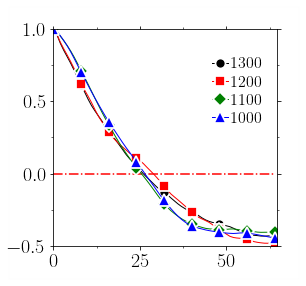

In [751]:
if eval(confParser['flags']['DislocAnl']) and not\
   eval(confParser['flags']['RemoteMachine']):
    count=0
    #--- initialize plot object
    ax=PltErr([0,(np.max(r)-np.min(r))/2],[0,0],attrs={'fmt':'-.r'},Plot=False)
    legends = Legends()
    legends.Set(fontsize=16,labelspacing=.2,
                bbox_to_anchor=(0.5,0.44,0.5,0.5),
#                bbox_to_anchor=(0.65,0.3,0.5,0.5),
               )

        
    for load in [
                        [1300,1200,1100,1000], #--- csa
                        [1200,1100,900,800,750,700], #--- rsa
][indxx]:

        print('load=%s'%load)
        pathh = [
                 'NiCoCrNatom100KTemp600/dislocated/load%s/Run0/dislocations'%load, #--- csa
                 'NiCoCrNatom100KTemp600Rss/dislocated/load%s/Run0/dislocations'%load, #--- rsa
                'dislocations'
        ][indxx]
        try:
            sdata0 = np.loadtxt('%s/vx0_profile_multiple_times.txt'%pathh) #--- velocity profile
            sdata1 = np.loadtxt('%s/vx1_profile_multiple_times.txt'%pathh) #--- velocity profile

            #--- fetch data
            r = sdata0[:,0]
            vx0 = sdata0[:,1:]
            vx1 = sdata1[:,1:]

            #--- plot
            ntime=vx1.shape[1]
            timei=int(ntime/2)
            timef=ntime
            
            #--- correlations
            xint = r

            #--- plot

            #--- correlation
            vx = [vx0,vx1][dislocation_id]
            cvx = np.c_[list(map(lambda x:PltCrltnn(xint,x,Plot=False,#ax=ax,
        #                            xstr=r'$|z-z^\prime|$' if not eval(confParser['flags']['RemoteMachine']) else 'dz',
        #                               ystr=r'$\langle v_x(z)v_x(z^\prime)\rangle$' if not eval(confParser['flags']['RemoteMachine']) else 'c(dz)',
                                                   )[1].real,
                     vx.T[timei:timef:1]))]

            #--- plot correlations
            z = PltCrltnn(xint,cvx[0],Plot=False)[0]
#            print('z.shape=',z.shape)
#            print('cvv.shape=',cvx.shape)
            cmean = np.mean(cvx,axis=0)
#            print('cmean.shape=',cmean.shape)
            erry = np.std(cvx,axis=0)/len(cvx)**0.5

            utl.PltErr(z,cmean,yerr=None, Plot=False,
                   ax=ax, #markevery=8,Plot=False,label=r'$%s$'%load,
                           attrs=symbols.GetAttrs(count=count,label=r'$%s$'%load,nevery=8,fmt='-')
                  )

        
            count += 1
        except:
            traceback.print_exc()
            continue
            
utl.PltErr(None,None,ax=ax,
       DrawFrame=[0.2,0.1,0.15,0.1,0.01],
       attrs={'markevery':8},
        title='dislocations/v0_crltn_%s_multipleLoads.png'%indxx,
        legend=legends.Get(),          
               ylim=(-0.5,1),
        xlim=(0,(np.max(r)-np.min(r))/2),

      )
plt.show()

z.shape= (65,)
cvv.shape= (16, 65)
cmean.shape= (65,)


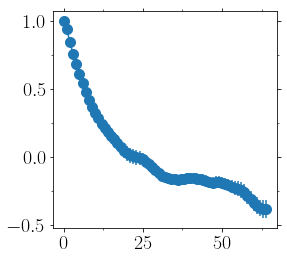

ksi_mean= 22.999999999999993


In [333]:
#     z = PltCrltn(xint,cvx[0],Plot=False)[0]
#     print('z.shape=',z.shape)
#     print('cvv.shape=',cvx.shape)
#     cmean = np.mean(cvx,axis=0)
#     print('cmean.shape=',cmean.shape)
#     erry = np.std(cvx,axis=0)/len(cvx)**0.5

#     PltErr(z,cmean,yerr=erry,
#  #            xstr=r'$|z-z^\prime|$' if not RemoteMachine else 'dz',
#  #            ystr=r'$\langle v_x(z).v_x(z^\prime)\rangle$' if not RemoteMachine else 'c(dz)'
#           )
#     print('ksi_mean=',z[cmean<0][0])
# #     np.savetxt('dislocations/vxcrltn.txt',np.c_[z,cmean.real,erry.real],header='z\tv_x(z)\terr')
# #     np.savetxt('dislocations/vxlength.txt',np.c_[temperature,z[cmean.real<0][0]],header='temp\tksi')

z.shape= (65,)
cvv.shape= (12, 65)
cmean.shape= (65,)


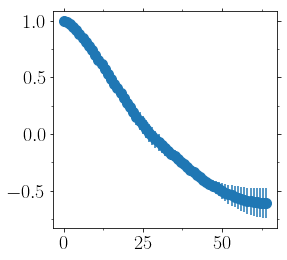

ksi_mean= 27.999999999999993


In [310]:
#     z = PltCrltn(xint,cvx[0],Plot=False)[0]
#     print('z.shape=',z.shape)
#     print('cvv.shape=',cvx.shape)
#     cmean = np.mean(cvx,axis=0)
#     print('cmean.shape=',cmean.shape)
#     erry = np.std(cvx,axis=0)/len(cvx)**0.5

#     PltErr(z,cmean,yerr=erry,
#  #            xstr=r'$|z-z^\prime|$' if not RemoteMachine else 'dz',
#  #            ystr=r'$\langle v_x(z).v_x(z^\prime)\rangle$' if not RemoteMachine else 'c(dz)'
#           )
#     print('ksi_mean=',z[cmean<0][0])
# #     np.savetxt('dislocations/vxcrltn.txt',np.c_[z,cmean.real,erry.real],header='z\tv_x(z)\terr')
# #     np.savetxt('dislocations/vxlength.txt',np.c_[temperature,z[cmean.real<0][0]],header='temp\tksi')

load=500


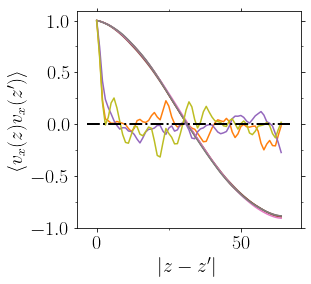

load=600


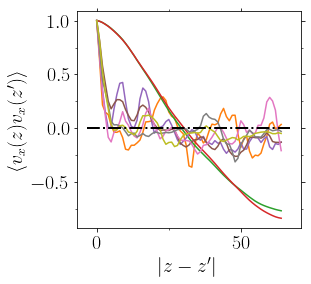

load=700


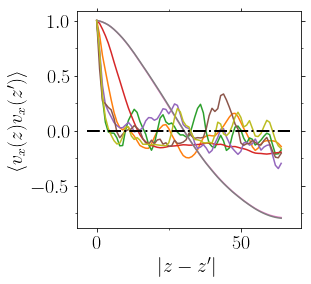

load=800


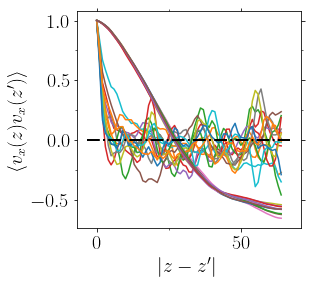

In [111]:
# if eval(confParser['flags']['DislocAnl']) and not\
#    eval(confParser['flags']['RemoteMachine']):
#     for load in ['500','600','700','800']: #--- different loads
#         print('load=%s'%load)
#         pathh = 'NiCoCrNatom100KTemp600/dislocated/load%s/Run0/dislocations'%load
#         sdata = np.loadtxt('%s/vxcrltn_multiple_times.txt'%pathh)
#         r = sdata[:,0]
#         cvx = sdata[:,1:]

#         #--- correlation
#         ax=PltErr(None,None,Plot=False)
#         list(map(lambda x:PltErr(r,x,ax=ax,
#                                 attrs={'fmt':'-'},
#                                 Plot=False,
#                                 ),
#                  cvx.T))
#         PltErr(ax.axis()[:2],[0,0],ax=ax,
#                Plot=False,
#                 xstr=r'$|z-z^\prime|$',
#                 ystr=r'$\langle v_x(z)v_x(z^\prime)\rangle$',
#                attrs={'fmt':'-.','color':'black','lw':2},
#                title='dislocations/vxcrltn_%s.png'%load
#               )
#         plt.show()

#### lengthscale

load=500
load=600
load=700
load=800


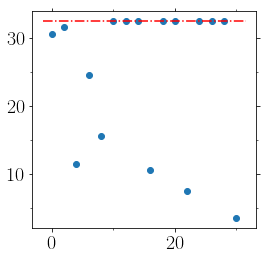

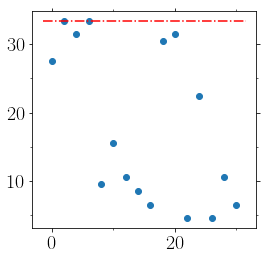

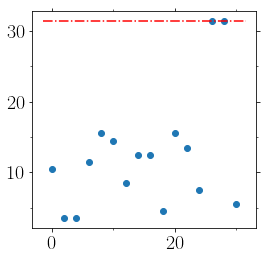

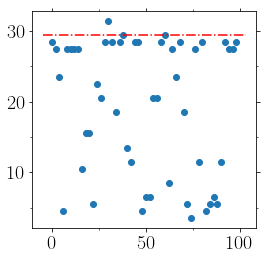

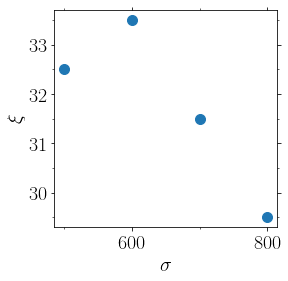

In [196]:
# if eval(confParser['flags']['DislocAnl']) and not\
#    eval(confParser['flags']['RemoteMachine']):
#     ksii = {}
#     for load in [500,600,700,800]:
#         print('load=%s'%load)
#         pathh = 'NiCoCrNatom100KTemp600/dislocated/load%s/Run0/dislocations'%load
#         sdata = np.loadtxt('%s/vxlength_multiple_times.txt'%pathh)
#         n=len(sdata)

#         ax=PltErr(sdata[:,0],sdata[:,1],
#            attrs={'fmt':'o'},
#            xstr=r'$t$',
#            ystr=r'$\xi$',
#             Plot=False,
#           )

#         ksii[load]=utll.GetQuantile(pd.Series(sdata[:,1]),0.95)

#         PltErr(ax.axis()[:2],[ksii[load],ksii[load]],
#                 attrs={'fmt':'-.r'},
#                Plot=False,
#                ax=ax
#               )
        
#     PltErr(ksii.keys(),list(map(lambda x:ksii[x],ksii.keys())),
# #            attrs={'fmt':'-.r'},
#            marker='o',
#            fmt='.',
#            Plot=True,
#            xstr=r'$\sigma$',
#            ystr=r'$\xi$',
#            title='dislocations/xi.png',
#           )
    
# #RemoteMachine=False